### Disclaimer: I hold no ownership over this notebook. This is documented by [Dr.Dhimant Ganatra](https://www.linkedin.com/in/dhimant-ganatra-3a6ba79/?originalSubdomain=in), my professor in R Programming

# Table of Contents
1. [ggplot2](#section-one)
    - [Scatterplot](#subsection-one)
    - [Bubble Chart](#subsection-two)
    - [Bar Chart](#subsection-three)
    - [Dot Plots](#subsection-four)
    - [Histogram](#subsection-five)
    - [Density Plot](#subsection-six)
    - [Box Plot](#subsection-seven)
    - [Violin Plot](#subsection-eight)
    - [Pie Chart](#subsection-nine)
    - [Heatmap](#subsection-ten)
    - [Scatterplot Matrix](#subsection-eleven)
    - [Mosaic Plot](#subsection-twelve)
    - [Quick Plot](#subsection-thirteen)
2. [Saving a plot](#section-two)

# Introduction

Data visualization is the **graphical representation of information and data**. It is useful to gain insights and understand what happened in the past.  By using visual elements like **charts, graphs, and maps,** data visualization tools provide an accessible way to see and **understand trends, outliers, and patterns in data**. Usually any analytics project starts with data visualisation. <br>
R programming provides comprehensive sets of tools such as in-built functions and a wide range of packages to perform data analysis, represent data and build visualizations. <br>
R provides many packages for data visualization, each with its advantages and disadvantages. Data visualization in R can be performed using: <br>
* 	Base Graphics
* 	Grid Graphics
* 	Lattice Graphics
* 	ggplot2

**Note:** When graphing for the first time with R, most people use base graphics and then move on to ggplot2 when their needs become more complex. In order to save time, we will straight away learn visualisation with ggplot2 ((by Leland Wilkinson).

<a id="section-one"></a>
# ggplot2
ggplot2 is an R package for **producing statistical, or data graphics**. It is the most modern of the plotting systems. The gg stands for grammar of graphics which aims to break down graphs into component chunks. ggplot2 is designed to work iteratively. You can start with a layer showing the raw data then add layers of annotations and statistical summaries. The ggplot2 graphics is composed of the following:
* 	Data
* 	Layers
* 	Scales
* 	Coordinates
* 	Faceting
* 	Themes <br>

Every ggplot2 plot has three key components:
1.  data, 
2.  A set of aesthetic mappings between variables in the data and visual properties, and 
3. At least one layer which describes how to render each observation. Layers are usually created with a geom function.

A geom is the geometrical object that a plot uses to represent data. We often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on. ggplot2 provides over 40 geoms, and extension packages provide even more. The best way to get a comprehensive overview is the ggplot2 cheatsheet.<br>

The basic syntax for ggplot is given below:<br>
**ggplot(data = , mapping = aes(x = , y = )) + geom_function()**<br>

The data and aesthetic mappings are supplied in ggplot(), then layers are added on with + sign.  To add additional variables to a plot, we can use other aesthetics like colour, shape, and size. An aesthetic is a visual property of the objects in the plot. Not every aesthetic works with every geom.<br>
**Tip:** Use the Data Visualisation with ggplo2t cheatsheet as reference<br>

We will be using the [Campus Recruitment dataset](https://www.kaggle.com/benroshan/factors-affecting-campus-placement) to understand most of the plots.



In [1]:
# Installing & Loading the package
library(ggplot2)

# read the data
location4 <- "../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv" # copy applicable path
placementgg <- read.csv(location4)
head(placementgg)
colnames(placementgg)
str(placementgg)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


[1] "sl_no"          "gender"         "ssc_p"          "ssc_b"         
 [5] "hsc_p"          "hsc_b"          "hsc_s"          "degree_p"      
 [9] "degree_t"       "workex"         "etest_p"        "specialisation"
[13] "mba_p"          "status"         "salary"

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int

<a id="subsection-one"></a>
# Scatterplot
The most frequently used plot for data analysis is the scatterplot. Whenever we want to **understand the nature of relationship between two variables**, invariably the first choice is the scatterplot. By displaying a variable in each axis, we can detect if a relationship or correlation between the two variables exists. It can be drawn using **geom_point()**.<br>

**Tip:** The + sign has to come at the end of the line in case the code is being split over multi lines.<br>

**Note:** ggplot2 will treat the x and y mappings as global mappings that apply to each geom in the graph. If you place mappings in a geom function, ggplot2 will treat them as local mappings for the layer. It will use these mappings to extend or overwrite the global mappings for that layer only. This makes it possible to display different aesthetics in different layers.

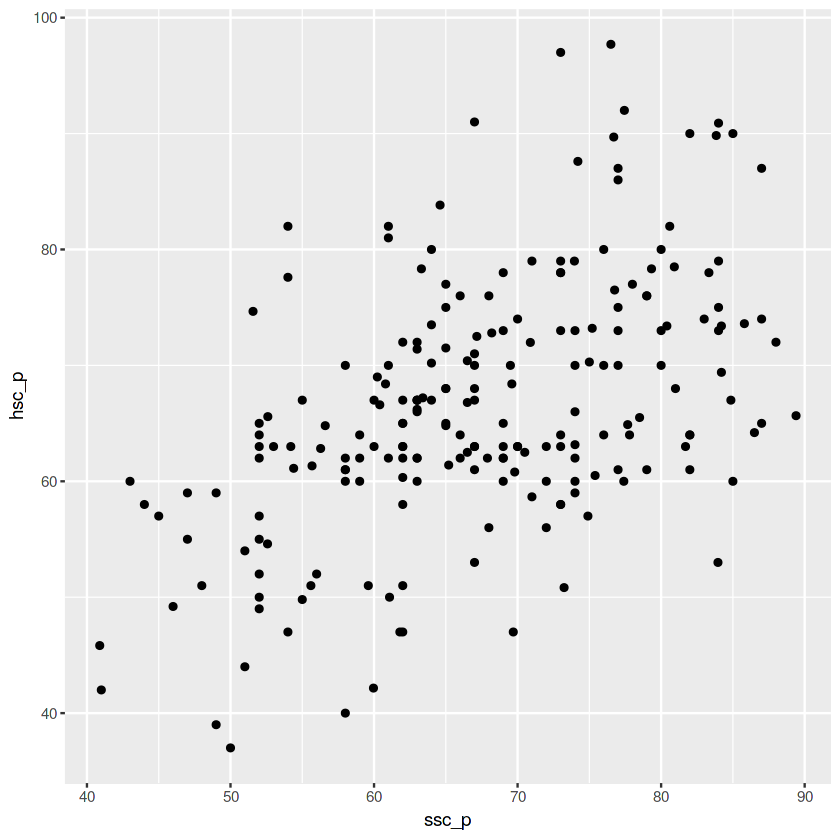

In [2]:
base1 <- ggplot(placementgg, aes(x= ssc_p, y = hsc_p))
base1 + geom_point()

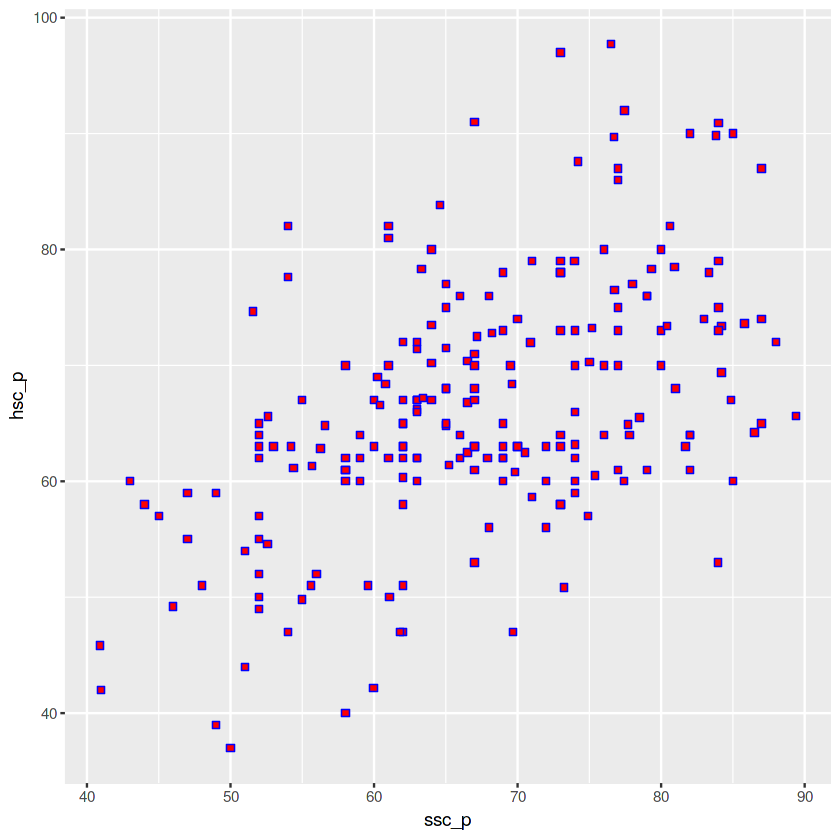

In [3]:
# Static
base1 + geom_point(shape = 22, color = "blue", fill = "red", size = 2) # You can add shape,colour,fill,size in geompoint()

In the above, the aesthetic is set by name as an argument of geom function; i.e. it goes outside of aes()
We can convey information about our data by mapping the aesthetics in our plot to the variables in our dataset. To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable inside aes(). 

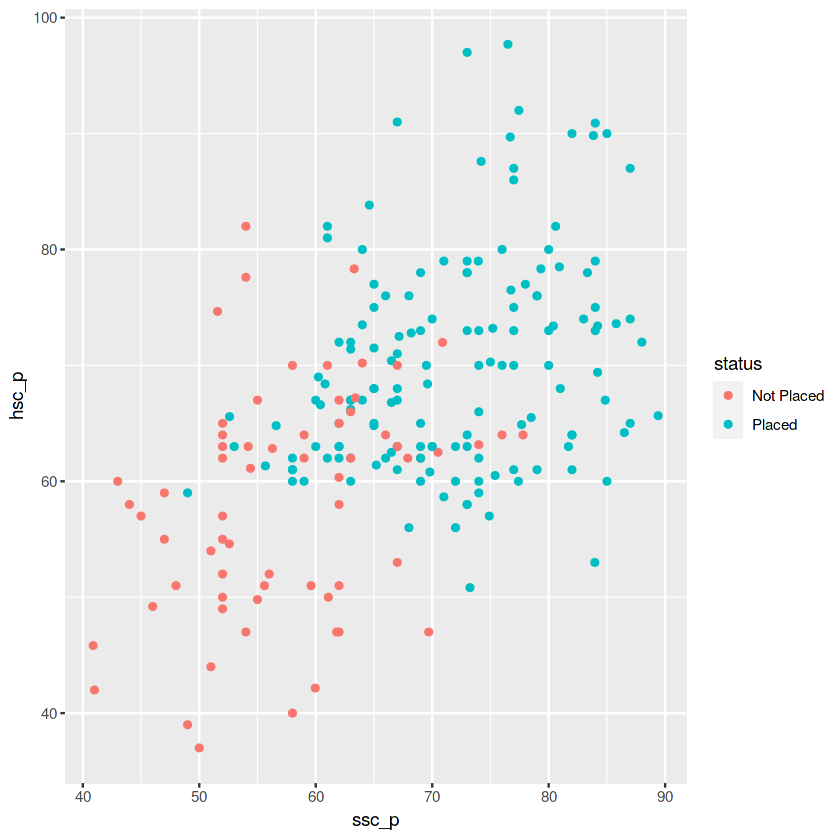

In [4]:
# Dynamic - Make the aesthetics vary based on a variable

base1 + geom_point(aes(color = status))

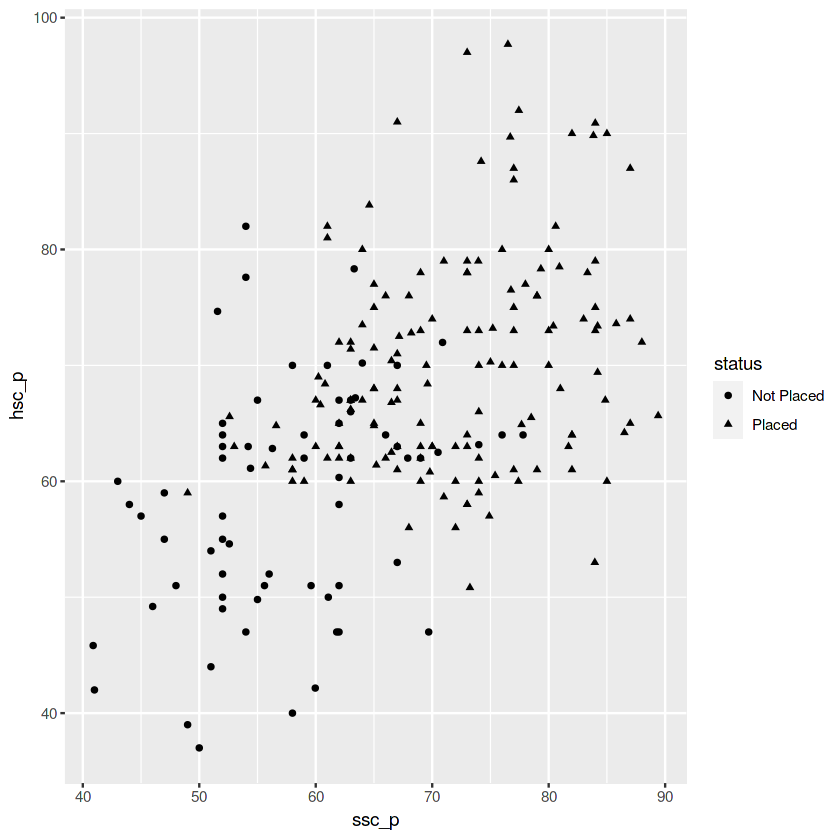

In [5]:
base1 + geom_point(aes(shape = status))

Warning message:
“Using size for a discrete variable is not advised.”


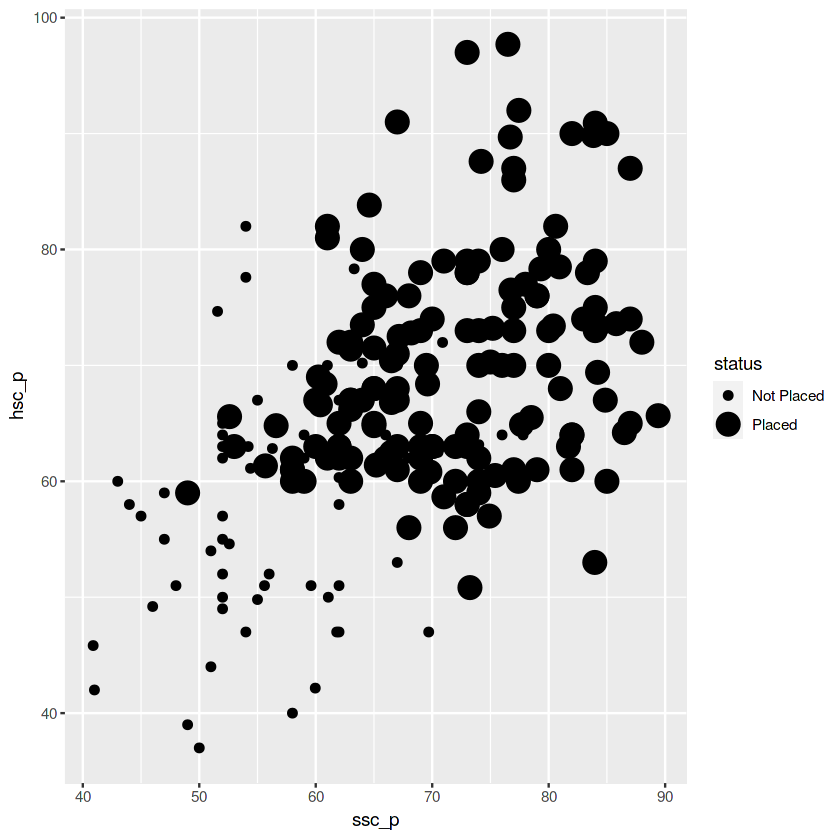

In [6]:
base1 + geom_point(aes(size = status))

Warning message:
“Using alpha for a discrete variable is not advised.”


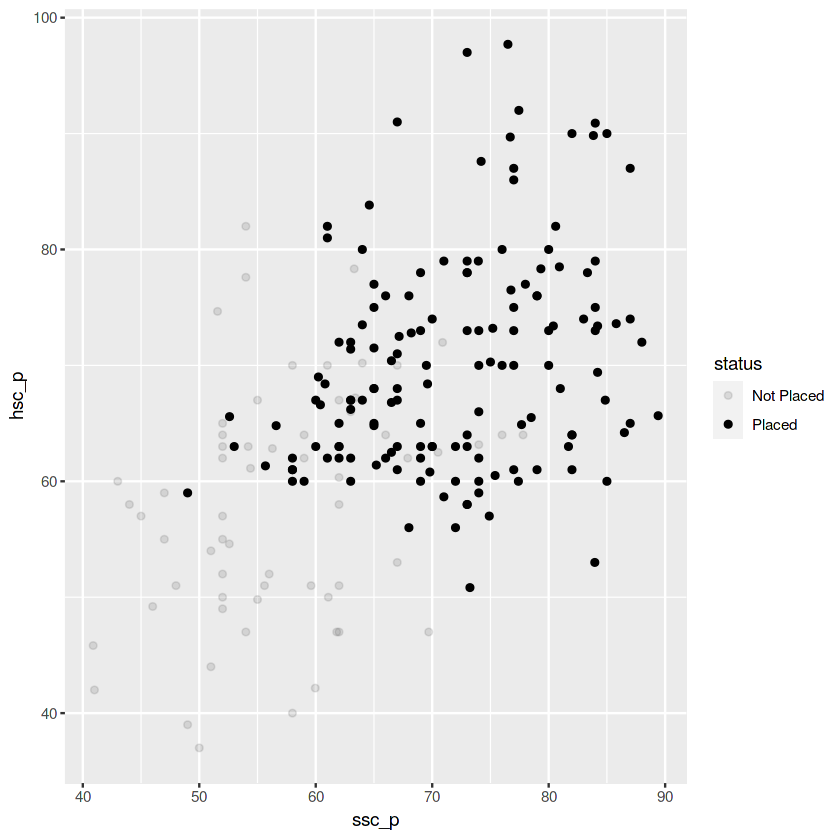

In [7]:
base1 + geom_point(aes(alpha = status))

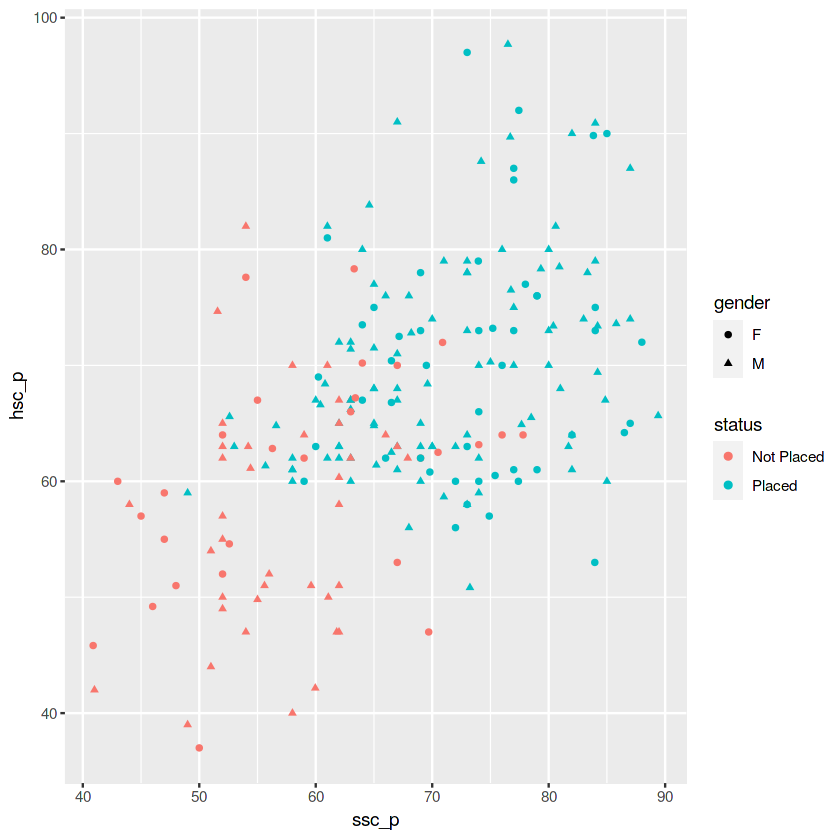

In [8]:
# add additional varaibales with aesthetics
base1 + geom_point(aes(color = status, shape = gender))

Warning message:
“Using size for a discrete variable is not advised.”


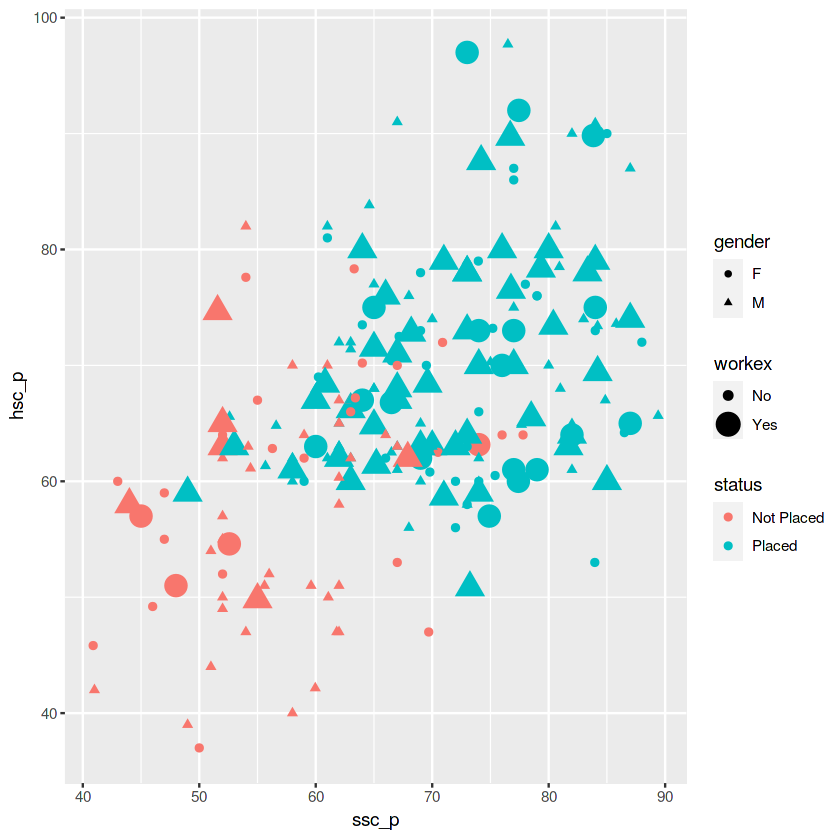

In [9]:
base1 + geom_point(aes(color = status, shape = gender, size = workex))

<a id="subsection-two"></a>
# Bubble Chart
A bubble chart is a variation of a scatter chart in which the **data points are replaced with bubbles**, and an additional dimension of the data is represented in the size of the bubbles. Just like a scatter chart, a bubble chart does not use a category axis — both horizontal and vertical axes are value axes. In addition to the x values and y values that are plotted in a scatter chart, a bubble chart plots x values, y values, and z (size) values.

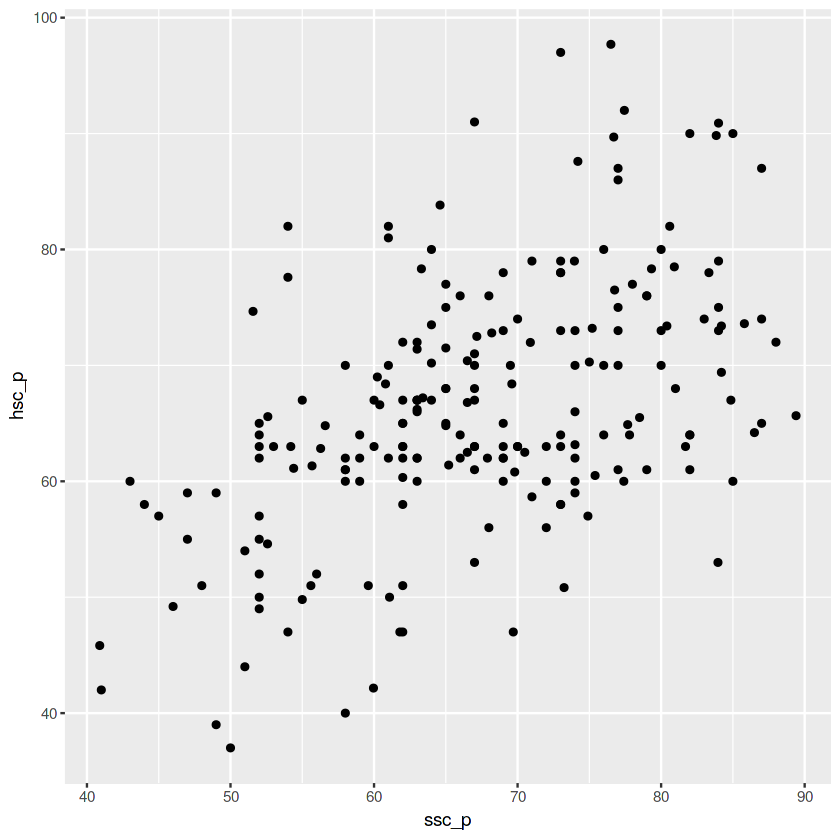

In [10]:
base1 + geom_point()

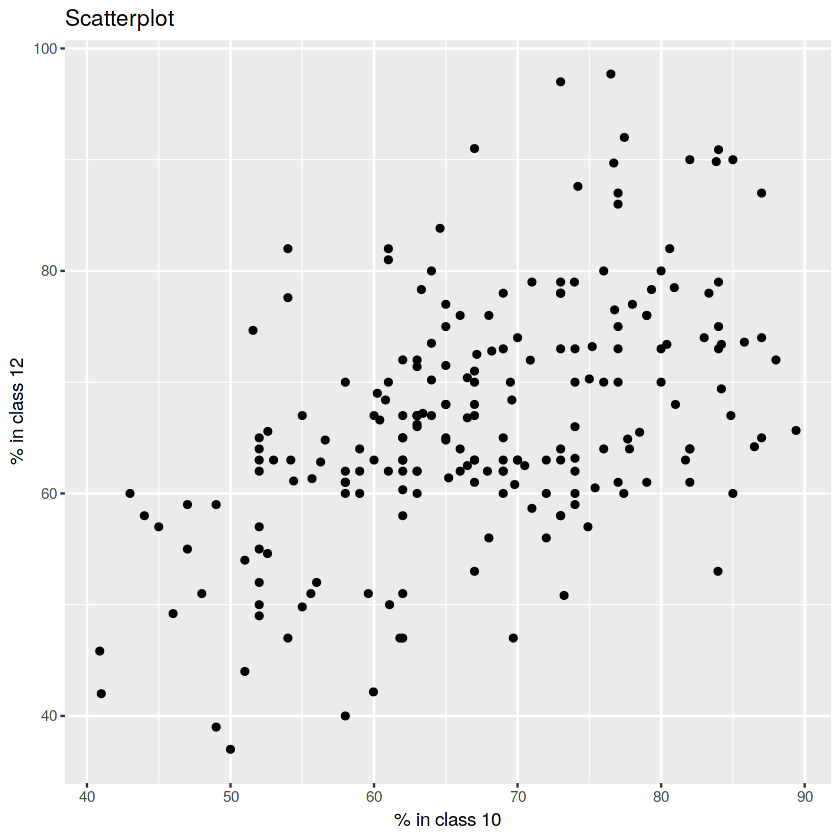

In [11]:
gg1 <- base1 + geom_point() + labs(title = "Scatterplot", x = "% in class 10", y = "% in class 12")
gg1

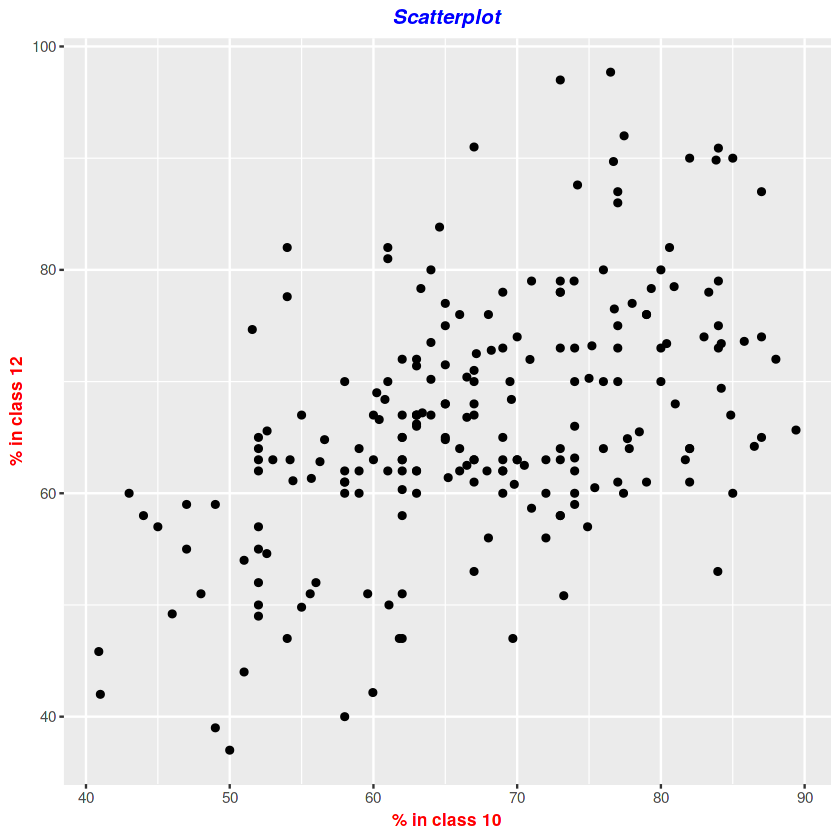

In [12]:
gg2 <- gg1 +
  theme(plot.title = element_text(face = 'bold.italic', colour = "blue", size = 12, hjust = 0.5),
        axis.title.x = element_text(face = 'bold', colour = "red", size = 10),
        axis.title.y = element_text(face = 'bold', colour = "red", size = 10))
gg2

### Adding a Smoother to a Plot: 
Lines or curves are fitted within the graph to aid in analysis and are drawn as close to all the points as possible and to show how all the points were condensed into a single line would look. We can add a smooth line to our existing scatter plot using geom_smooth(). The default line can be tweaked by specifying method argument. For example:- method = "lm" ﬁts a linear model, giving the line of best ﬁt. <br>
**Note:** We can place multiple geoms in the same plot.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



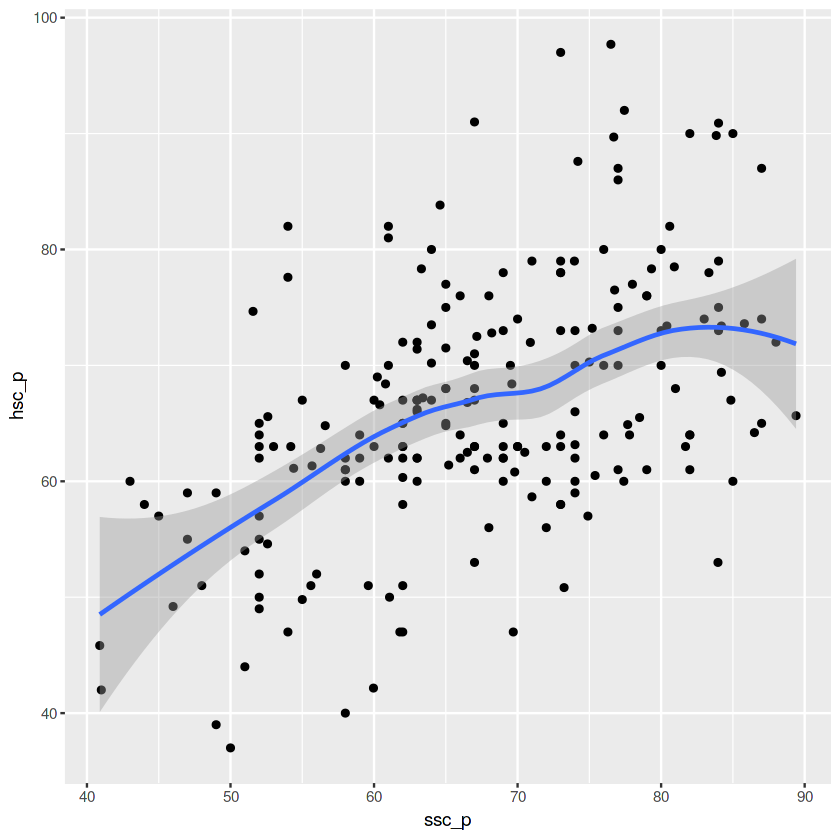

In [13]:
# using geom_smooth()
base1 + geom_point() + geom_smooth()

`geom_smooth()` using formula 'y ~ x'



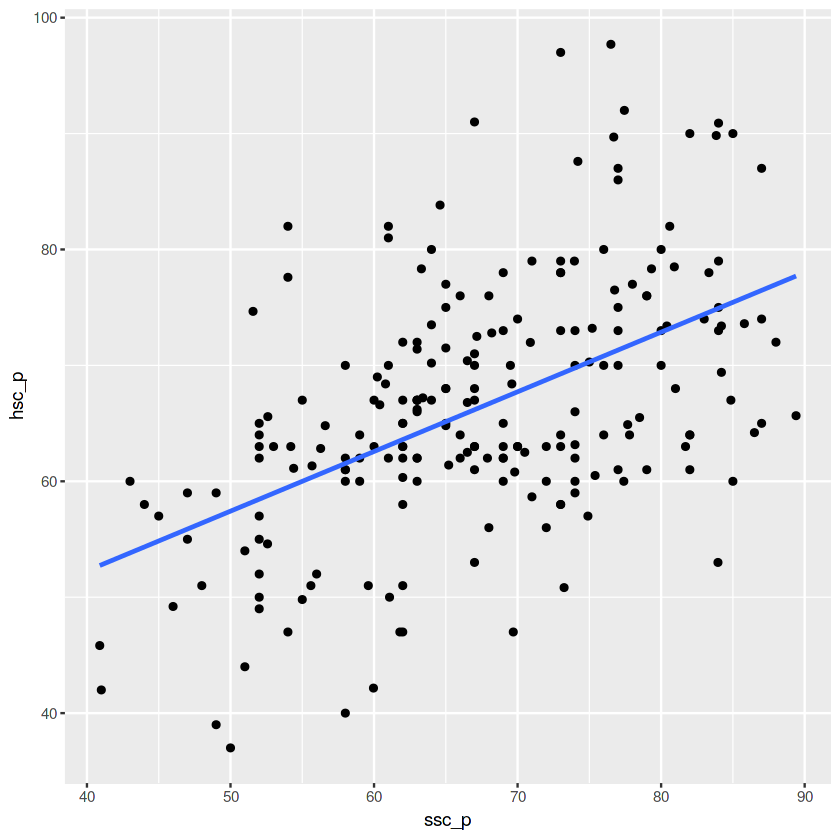

In [14]:
base1 + geom_point() + geom_smooth(method = "lm", se = F) # Don't add shaded confidence region

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



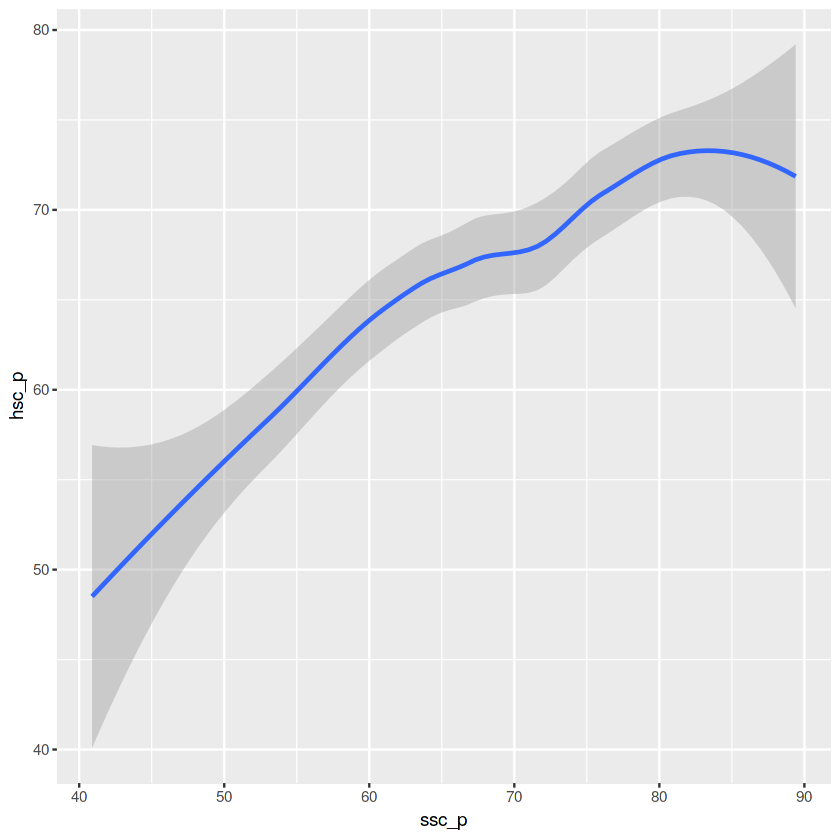

In [15]:
base1 + geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



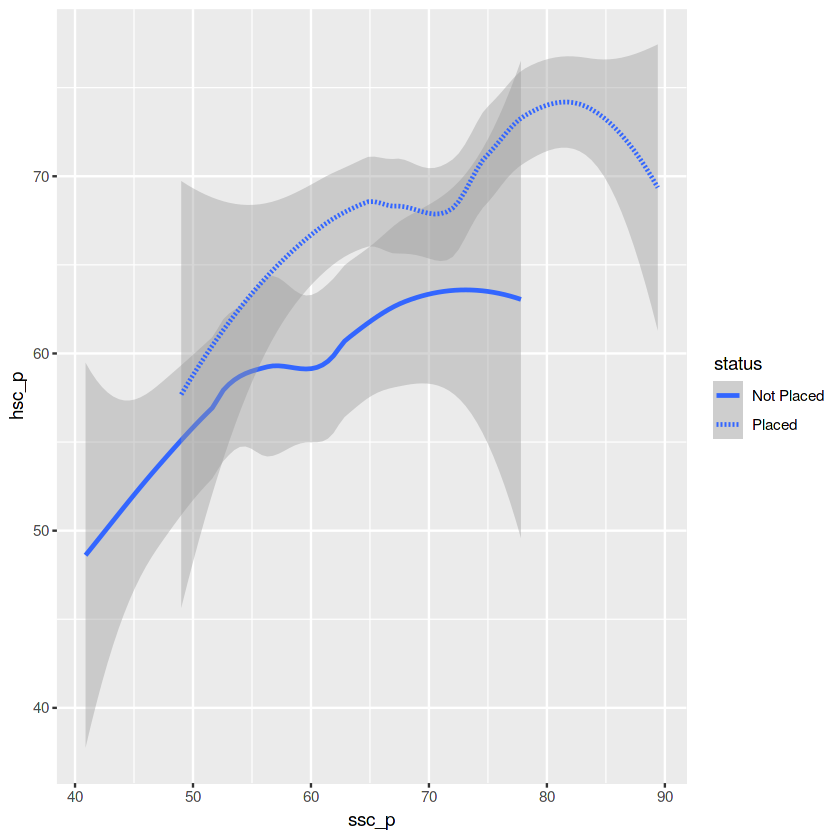

In [16]:
base1 + geom_smooth(aes(linetype = status))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



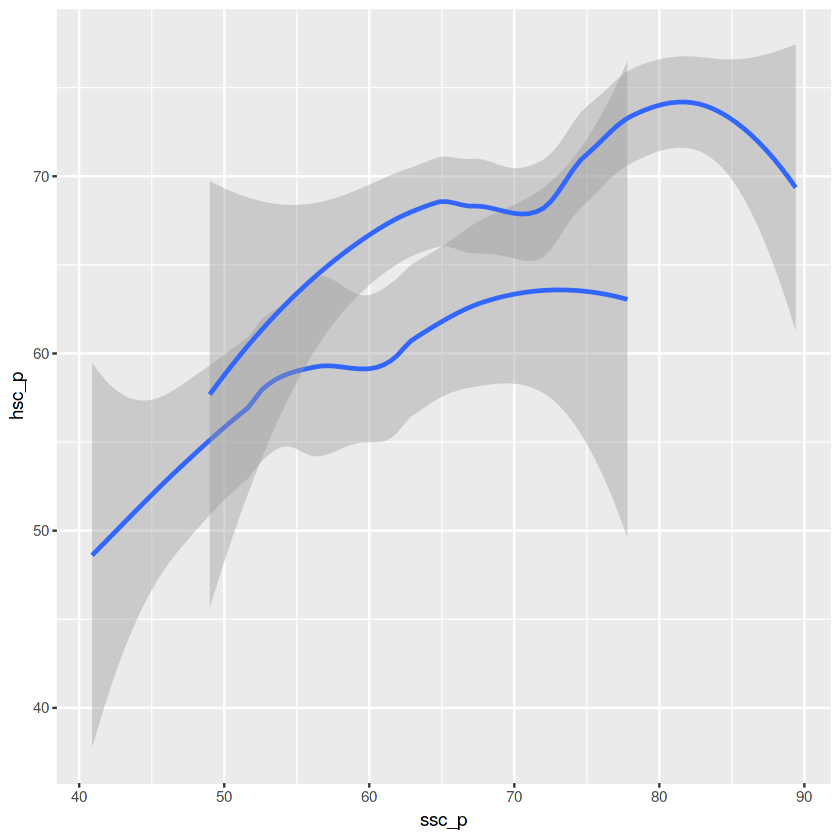

In [17]:
base1 + geom_smooth(aes(group = status))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



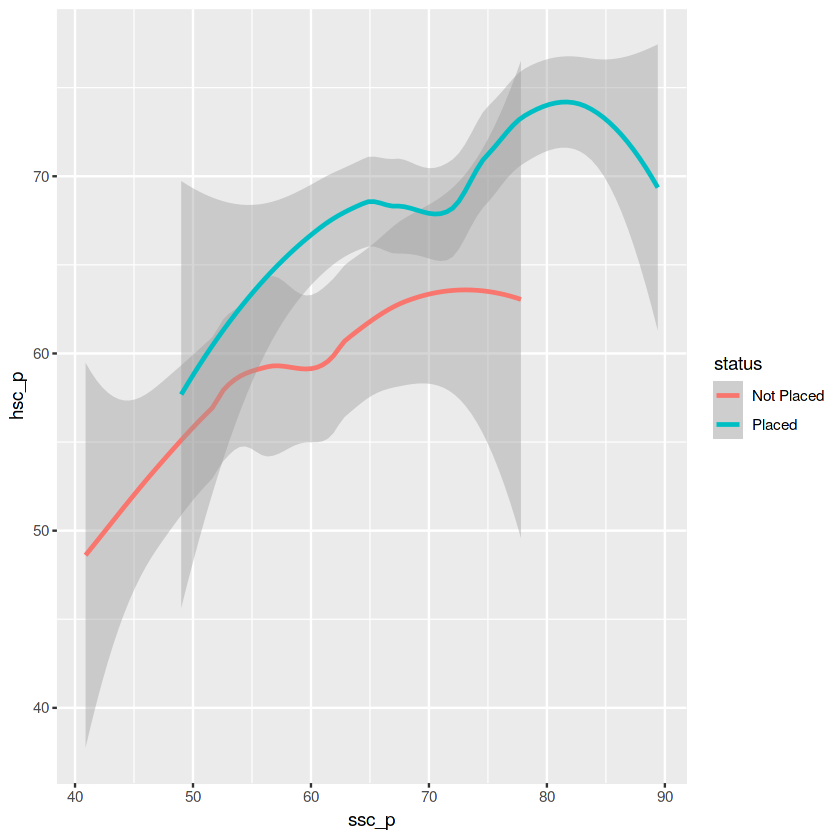

In [18]:
base1 + geom_smooth(aes(colour = status))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



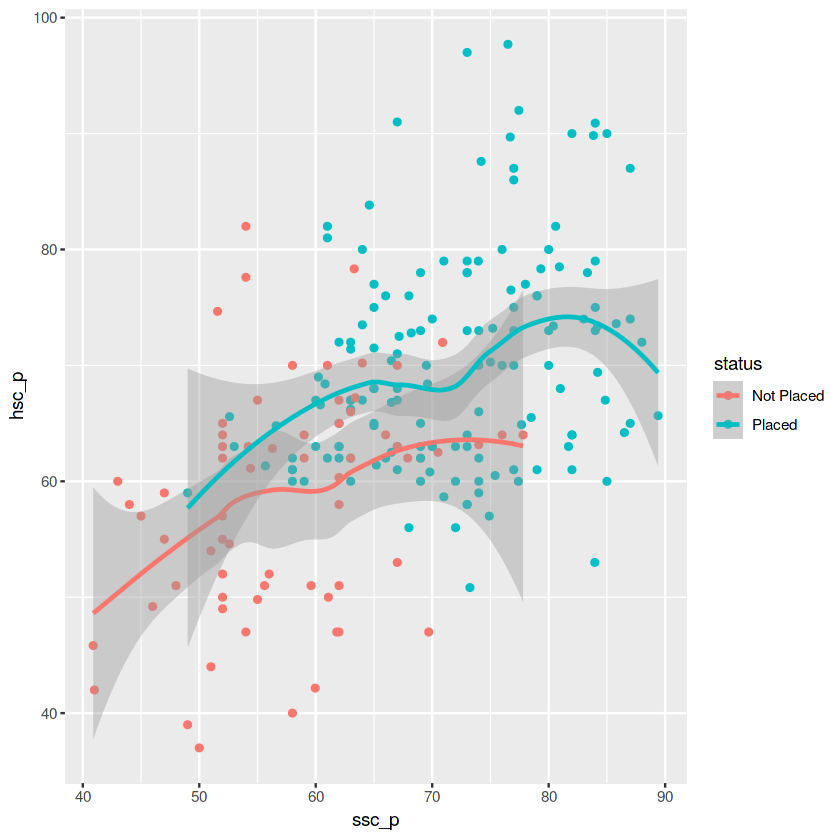

In [19]:
base1 + geom_point(aes(colour = status)) + geom_smooth(aes(colour = status))

<a id="subsection-three"></a>
# Bar Chart
Bar chart is a frequency chart for qualitative variable (or categorical variable). Bar chart can be used to assess the most-occurring and least-occurring categories within a data set. Bar chart answers the question of ‘how many?’ in each category.  geom_bar() is used to draw a bar chart.<br>

**Column Chart:** Vertical bar charts are commonly called column charts. A stacked column chart displays the contribution of each value to the total by stacking the rectangles and a 100% stacked column chart compares the percentage that each value contributes to a total.<br>

**Note:** By default, geom_bar() has the stat set to count. 


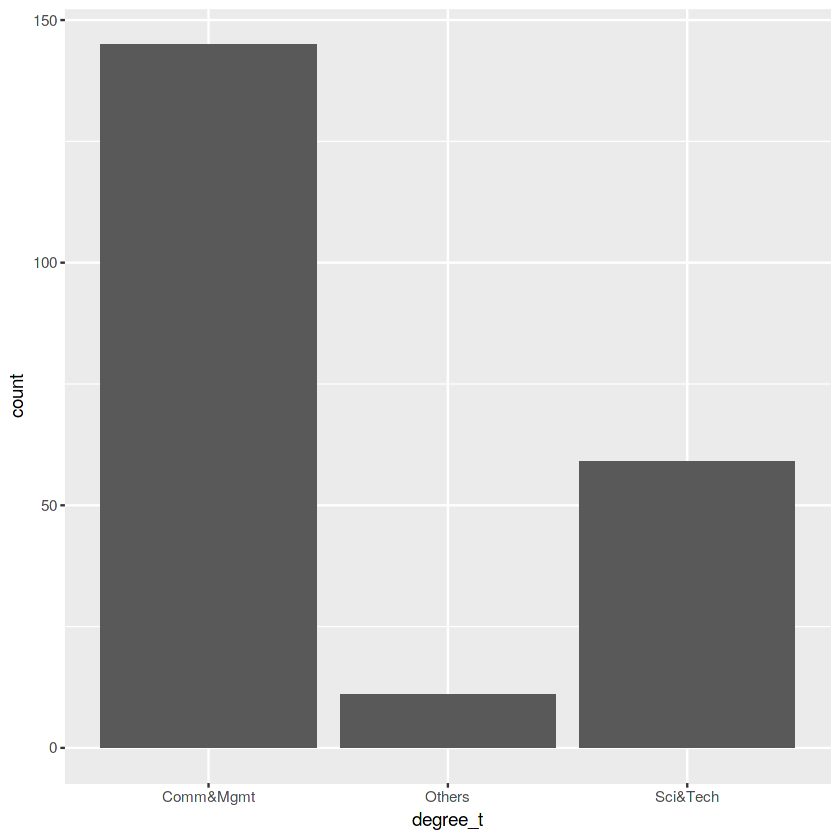

In [20]:
# Bar Chart
base2 <- ggplot(placementgg, aes(degree_t))
base2 +geom_bar()

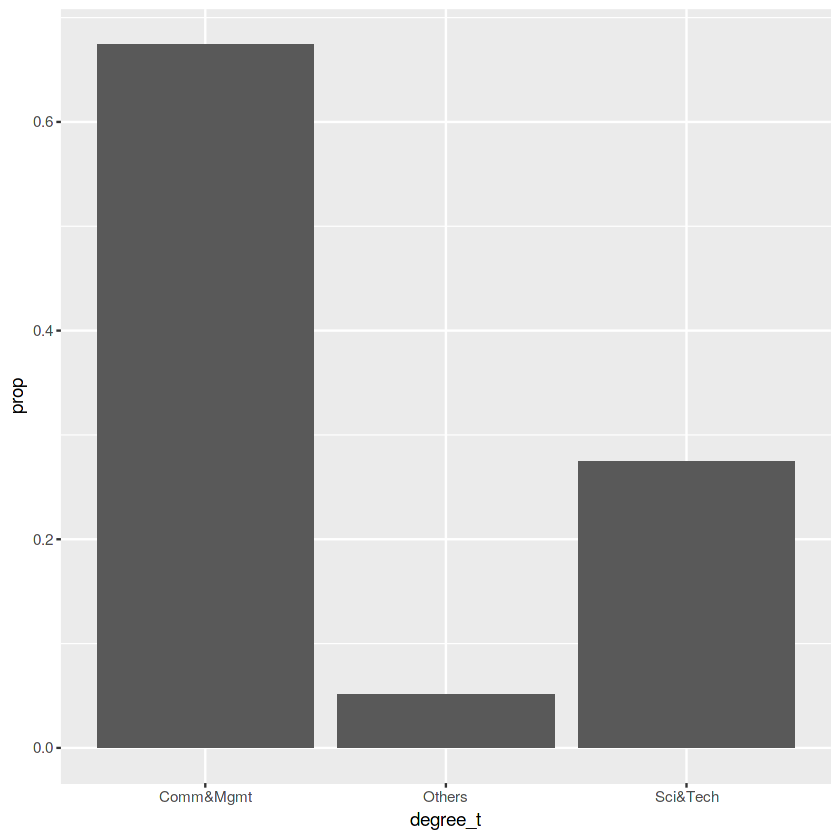

In [21]:
base2 + geom_bar(aes(y= stat(prop), group=1))

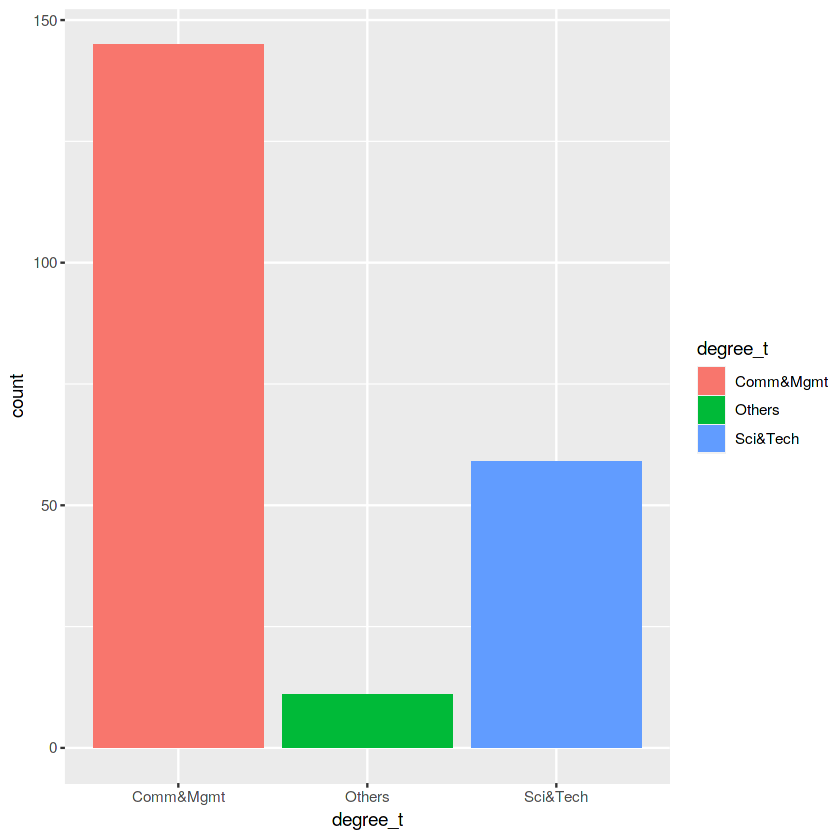

In [22]:
base2 + geom_bar(aes(fill = degree_t)) # color the bar chart (use same variable)

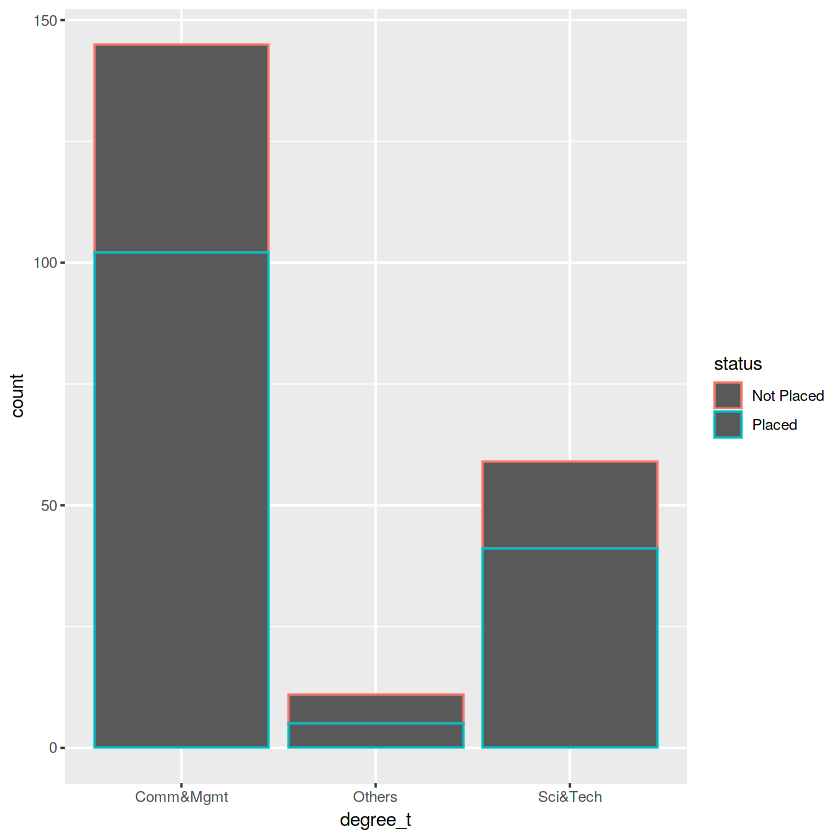

In [23]:
base2 + geom_bar(aes(color = status))

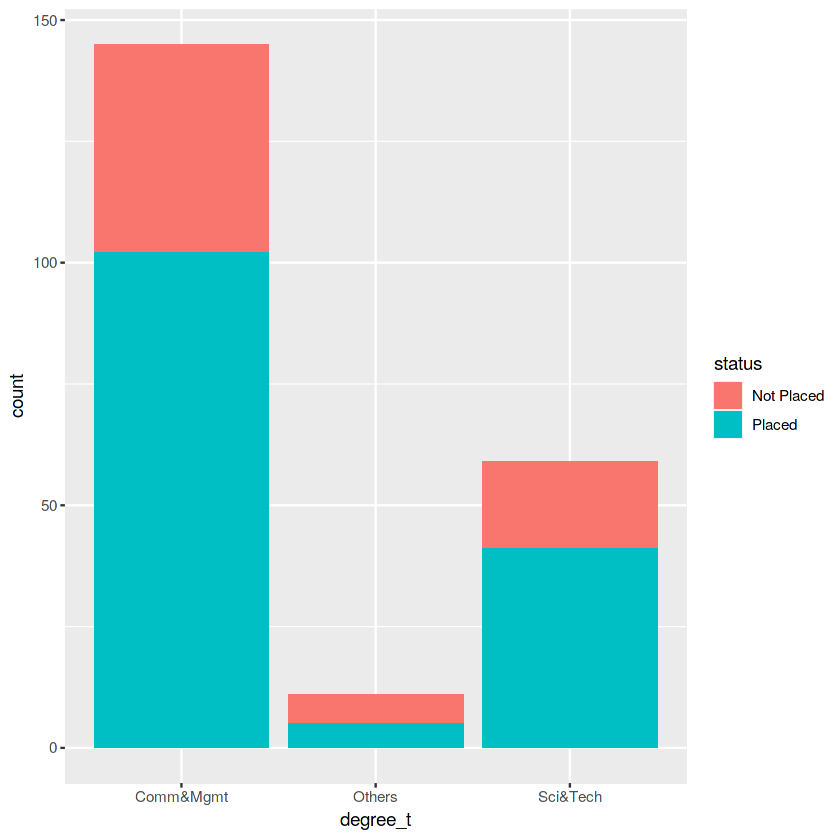

In [24]:
base2 + geom_bar(aes(fill = status)) # the bars are stacked

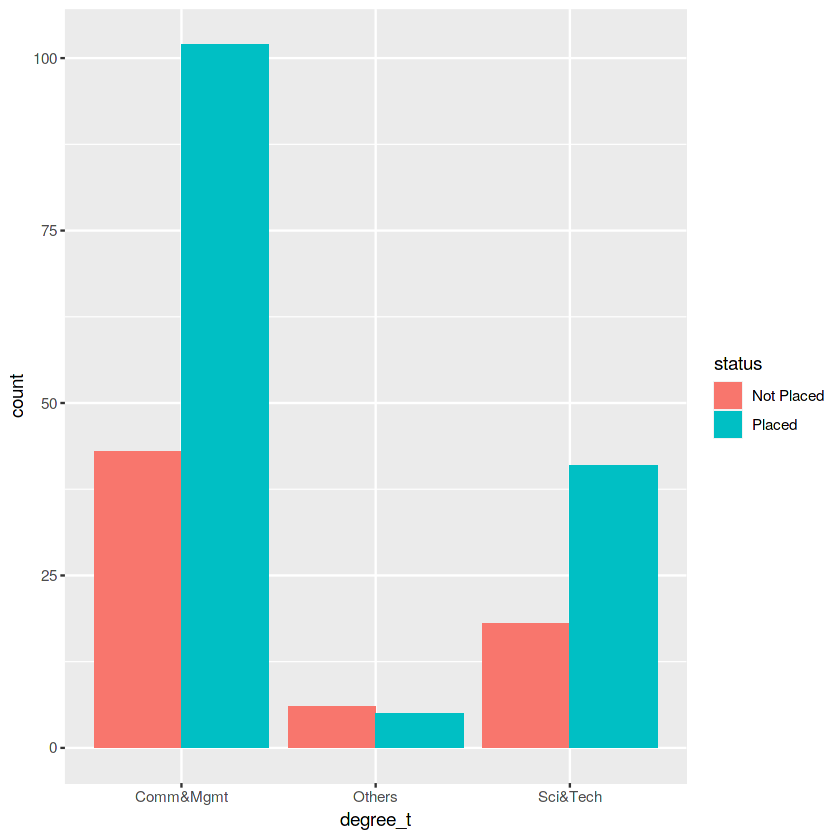

In [25]:
base2 + geom_bar(aes(fill = status), position = "dodge") #side-by-side

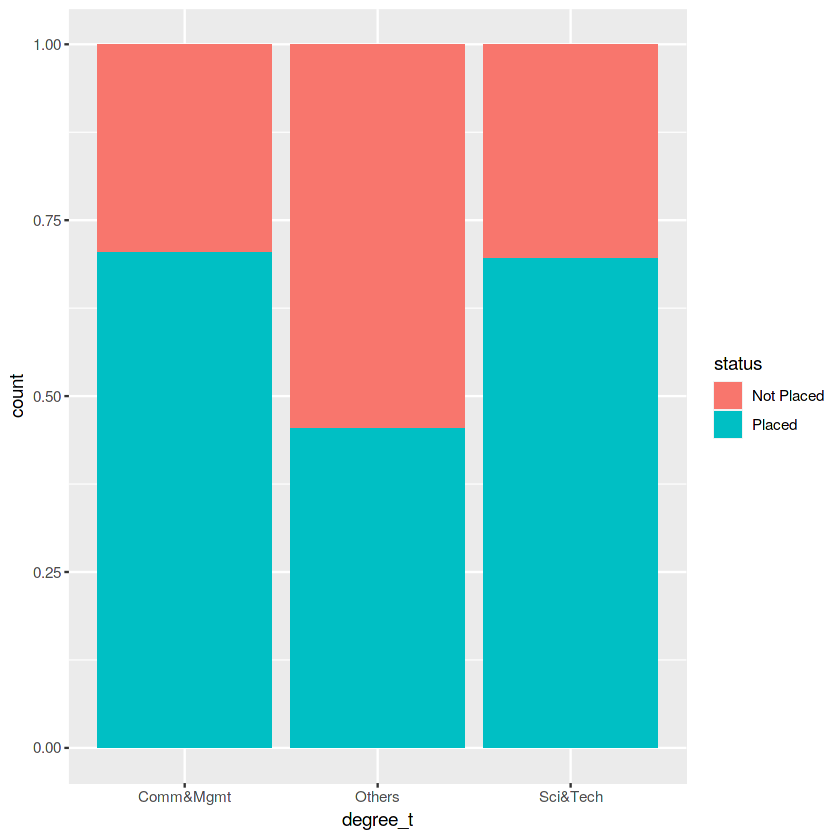

In [26]:
base2 + geom_bar(aes(fill = status), position = "fill") # percenatge bar chart

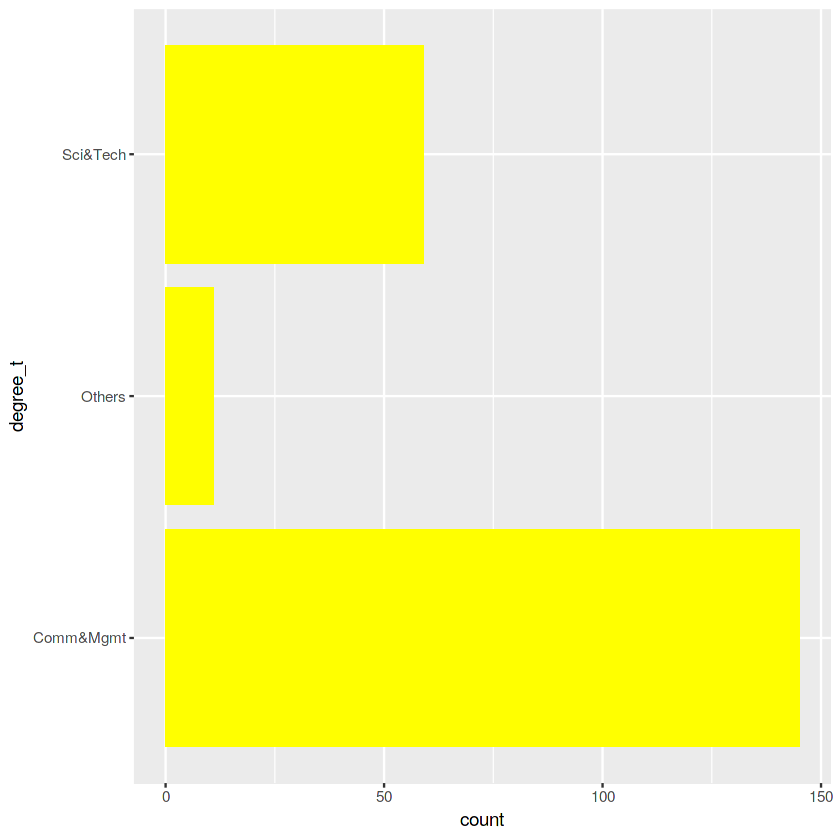

In [27]:
base2 + geom_bar(fill = "yellow") + coord_flip()

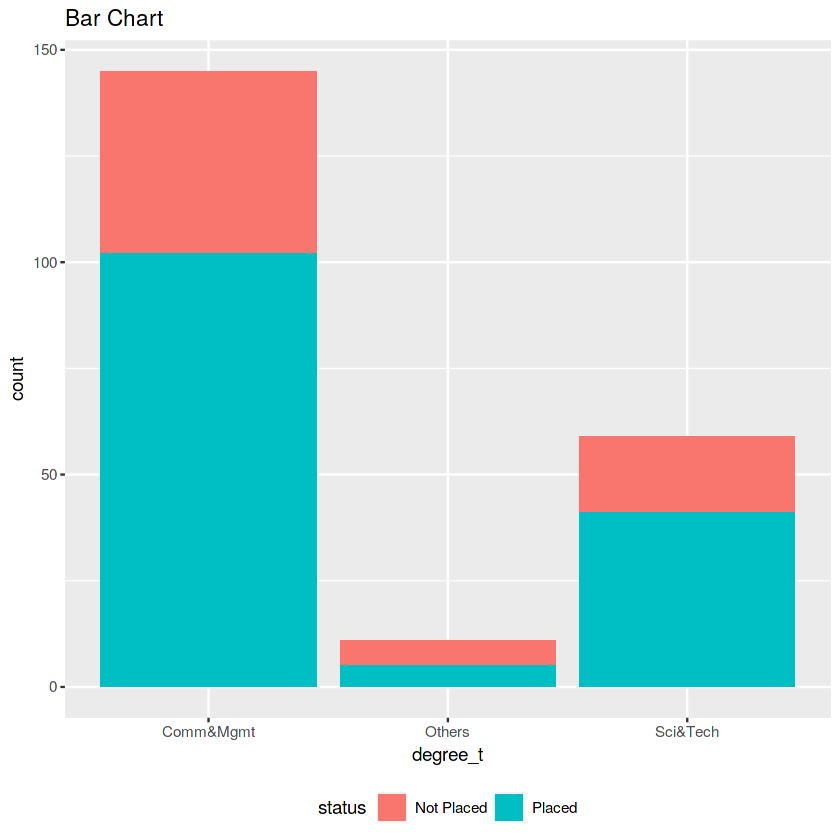

In [28]:
# Beautifying
base2 + geom_bar(aes(fill = status)) + theme(legend.position = "bottom") +
  ggtitle("Bar Chart")

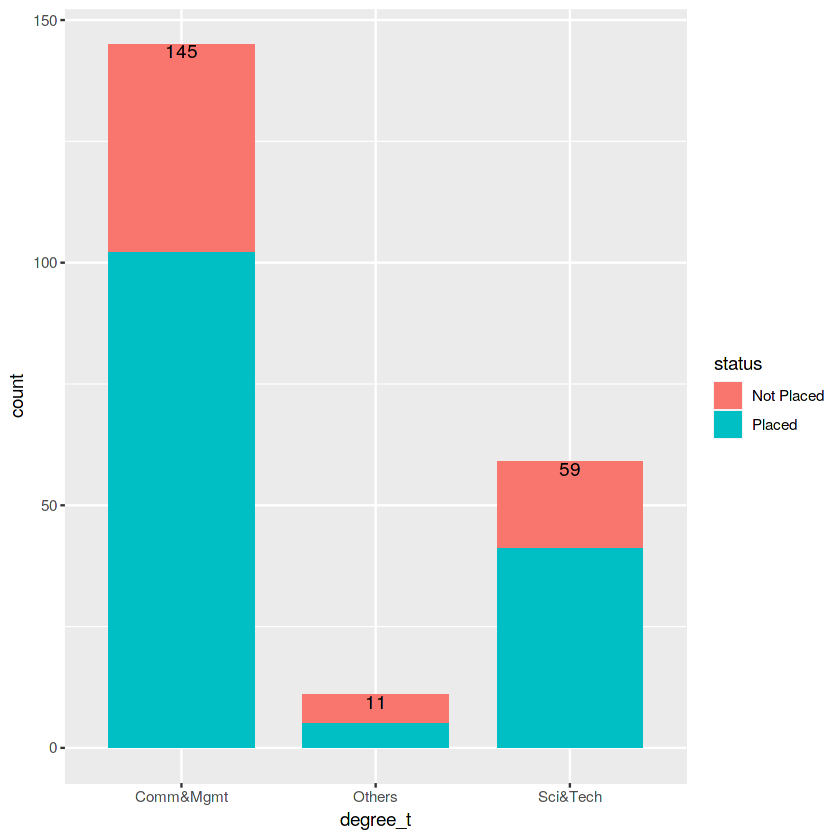

In [29]:
base2 + geom_bar(aes(fill = status), width = 0.75) +
  geom_text(stat = "count", aes(label=stat(count)), vjust = 1)

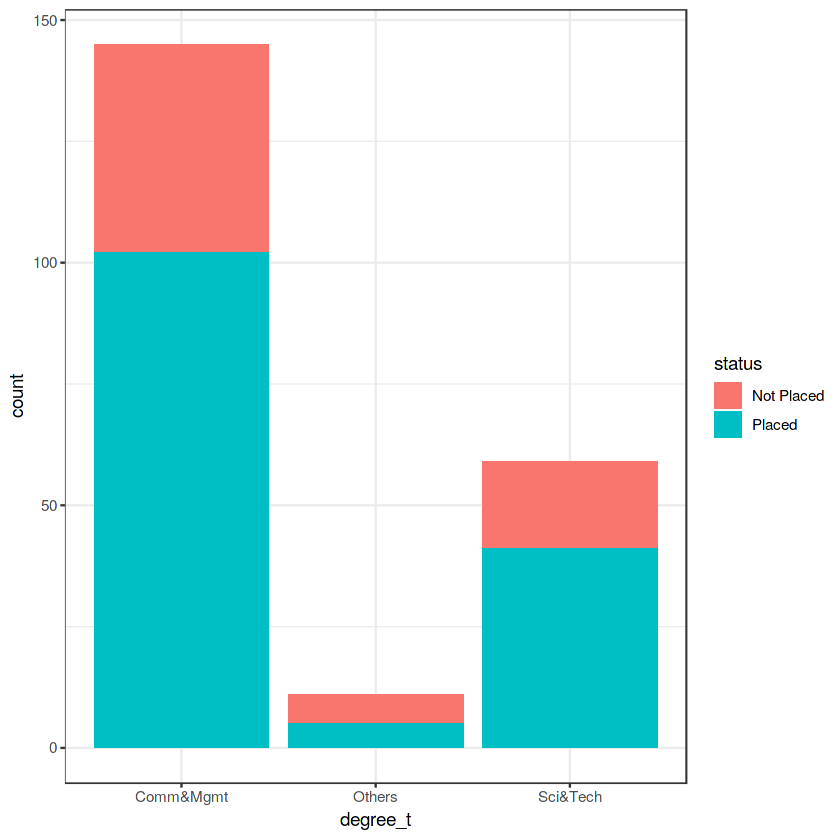

In [30]:
base2 + geom_bar(aes(fill = status)) + theme_bw() #theme function changes appearance

<a id="subsection-four"></a>
# Dot Plots
It is a relatively simple statistical chart that is generally **used to display continuous, quantitative data.** In a dot plot, each data value is plotted along the horizontal axis and is represented by a dot on the chart. If multiple data points have the same values, the dots will stack up vertically. Dot plots are especially useful for observing the overall shape of the distribution of the data points along with identical data values or intervals for which there are grouping and gaps in the data.

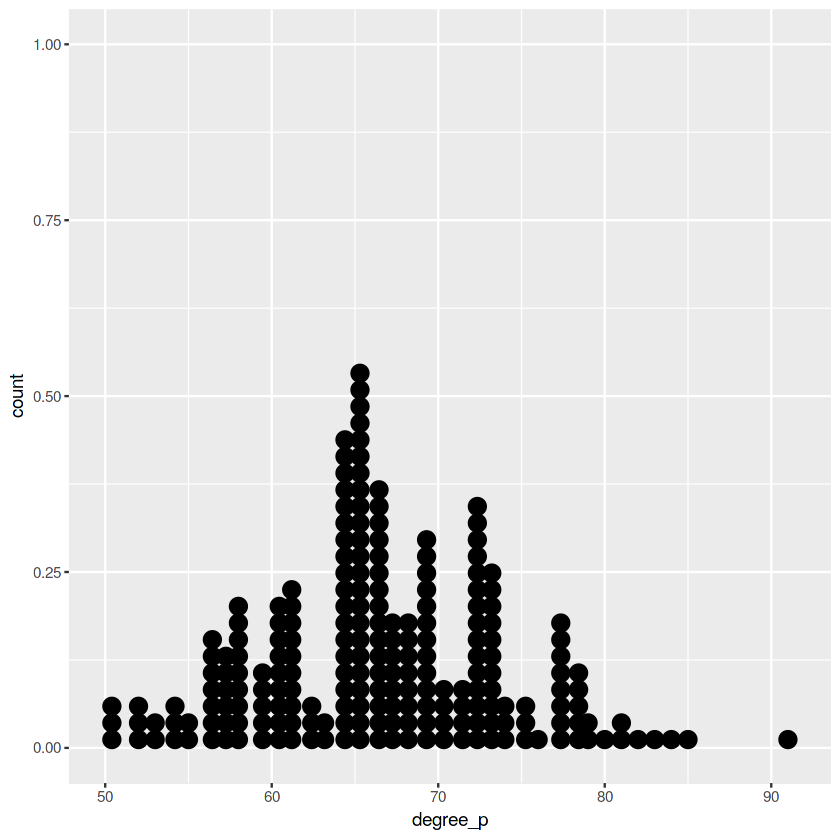

In [31]:
# Dot Plot
ggplot(placementgg, aes(degree_p)) + geom_dotplot(binwidth = 1)

<a id="subsection-five"></a>
# Histogram
A histogram is a plot to **explore the distribution of a continuous variable**. It is a frequency distribution of data arranged in consecutive and non-overlapping classes. Histograms give an insight into the underlying distribution (eg. normal distribution) of the variable, outliers, skewness etc. <br>

Histogram on a continuous variable can be accomplished using geom_histogram(). When using geom_histogram(), we can control the number of bars using the bins option. Else, we can set the range covered by each bin using binwidth. It is very important to experiment with the bin width. The default just splits the data into 30 bins, which is unlikely to be the best choice. We should always try many bin widths, and we may ﬁnd that we need multiple bin widths to tell the full story of our data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



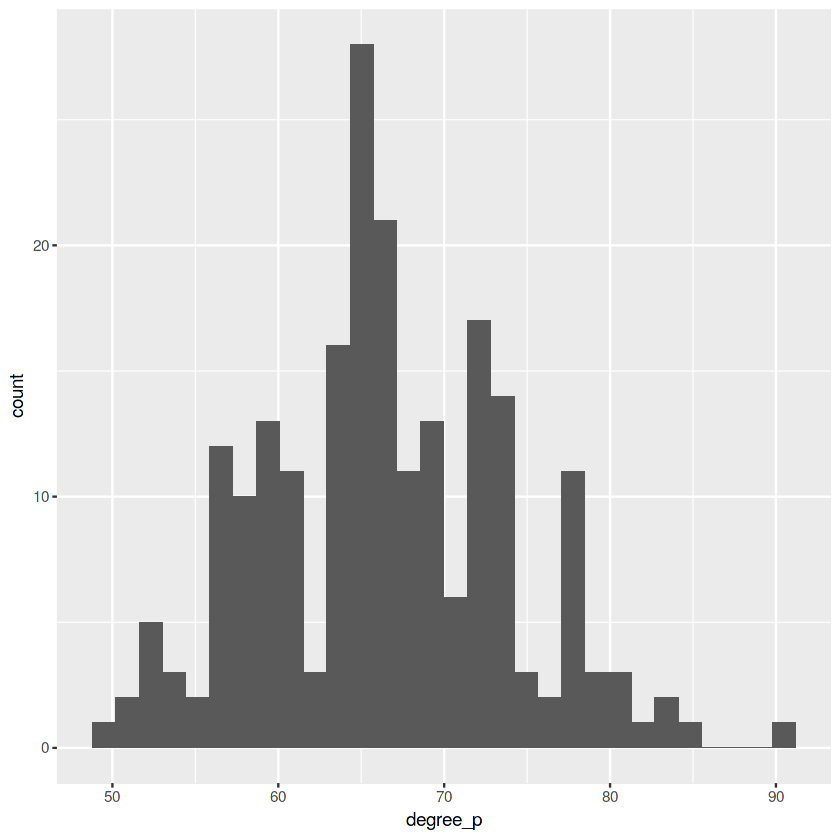

In [32]:
# Histogram
base3 <- ggplot(placementgg, aes(degree_p))
base3 + geom_histogram()

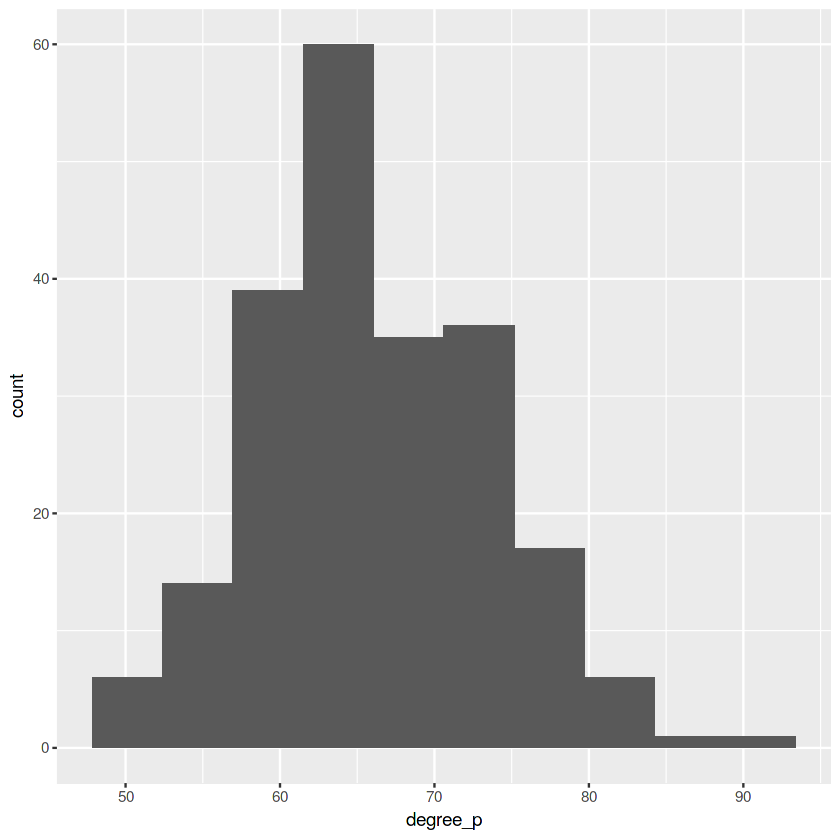

In [33]:
base3 + geom_histogram(bins = 10)

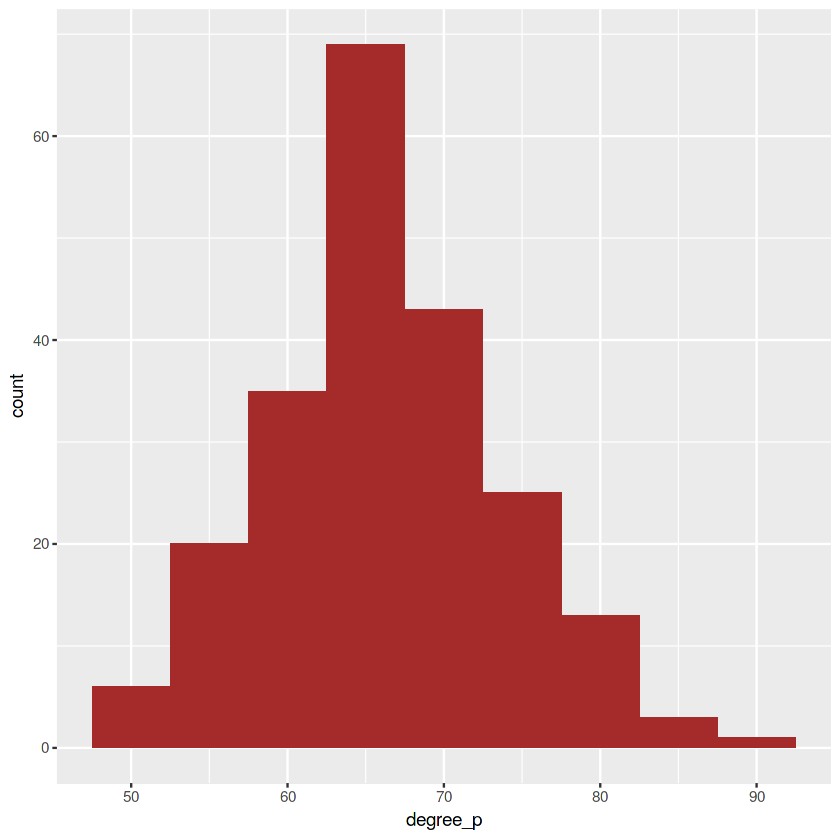

In [34]:
base3 + geom_histogram(binwidth = 5, fill = "brown")

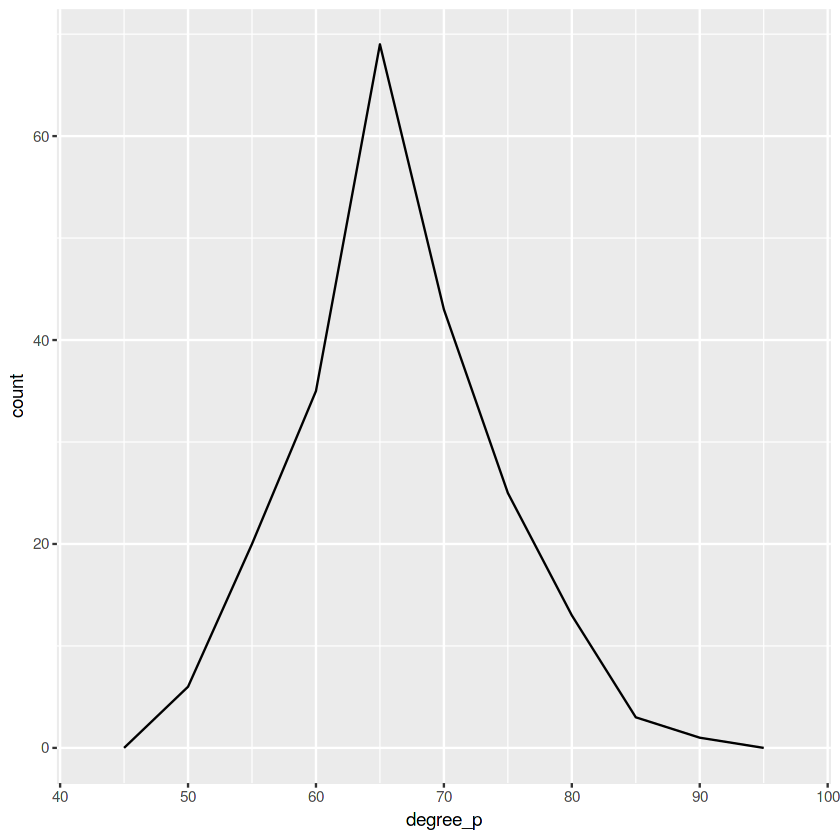

In [35]:
base3 + geom_freqpoly(binwidth = 5) #  frequency polygons use lines instead of bars

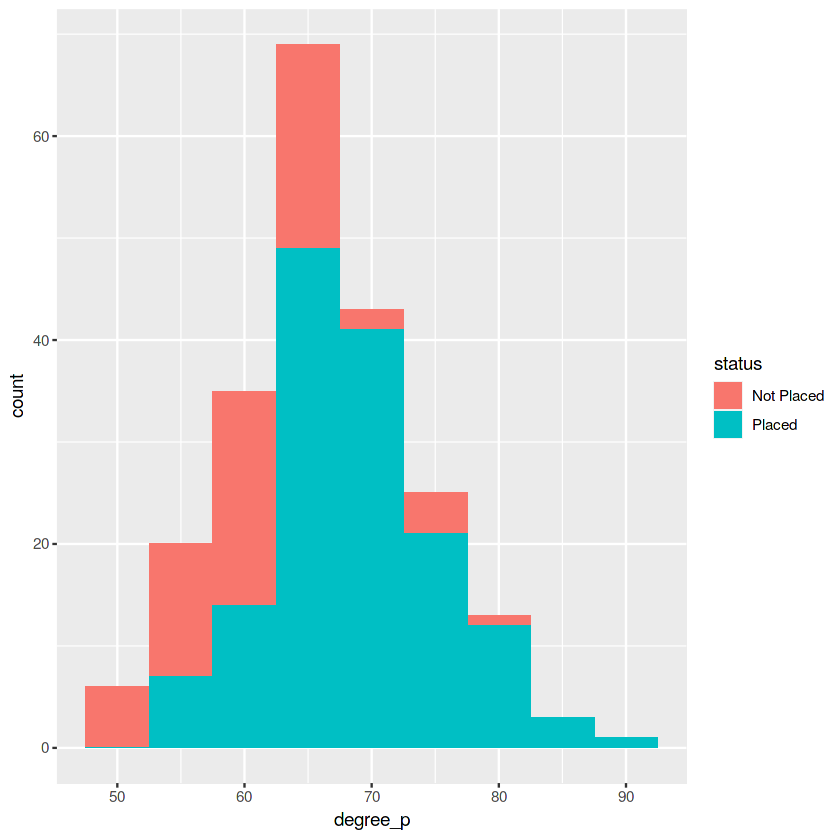

In [36]:
base3 + geom_histogram(aes(fill = status), binwidth = 5) 

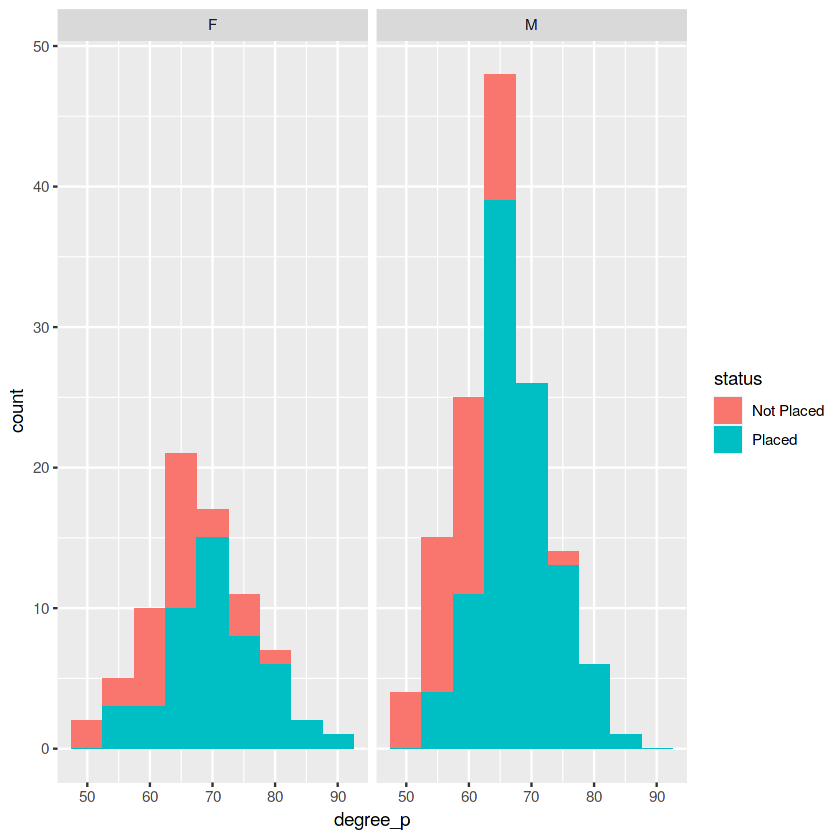

In [37]:
base3 + geom_histogram(aes(fill = status), binwidth = 5) + facet_wrap(~gender)

<a id="subsection-six"></a>
# Density Plot

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval. <br>

An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used.


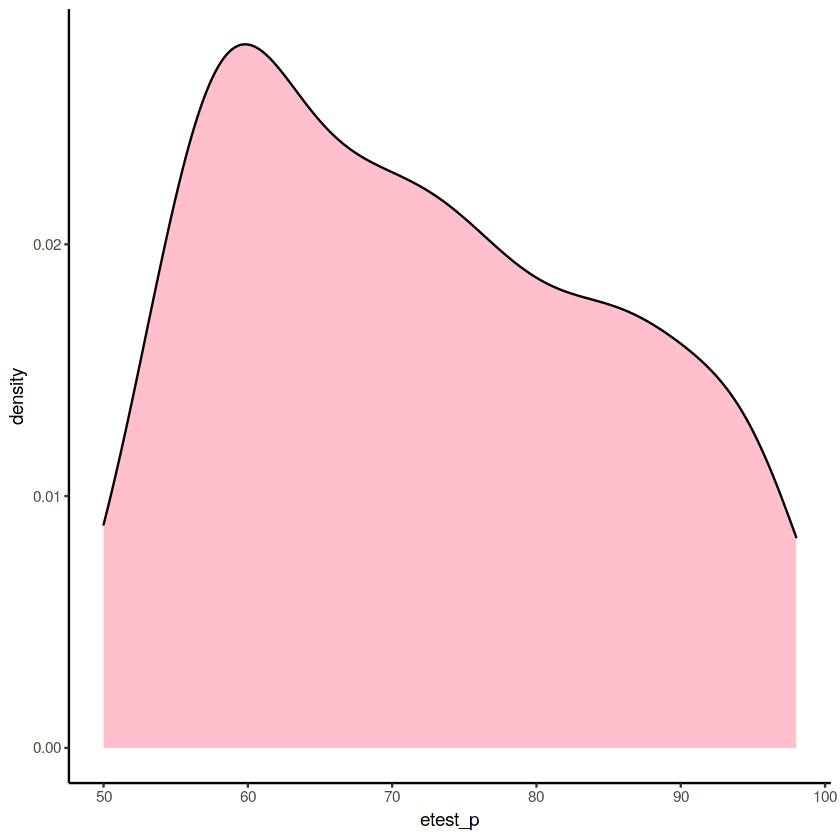

In [38]:
# Density Plot
ggplot(placementgg) + geom_density(aes(etest_p), fill = "pink") + theme_classic()

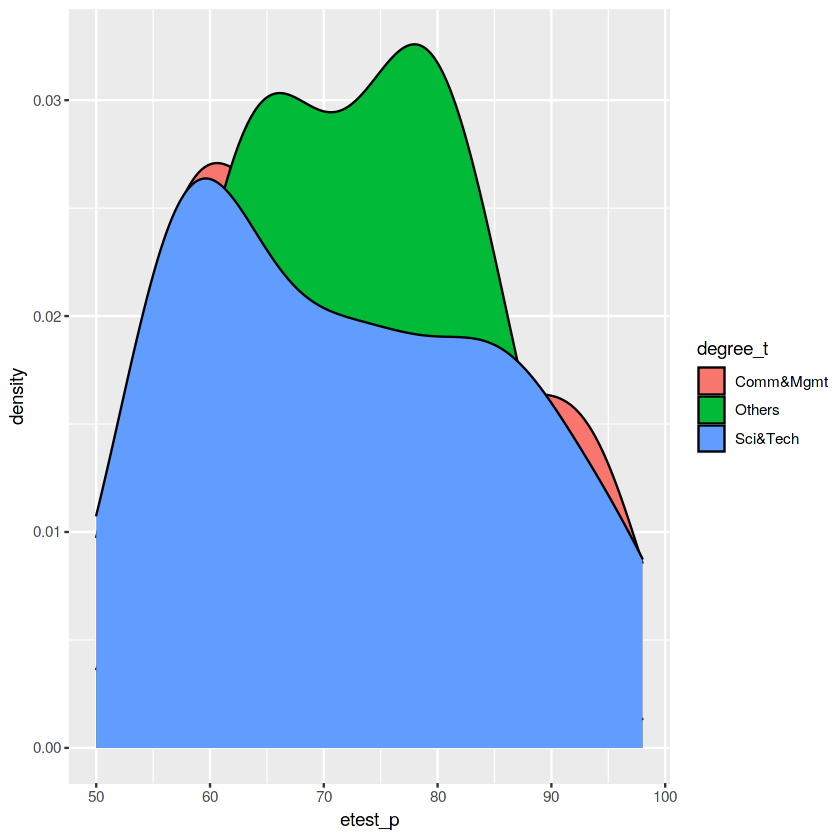

In [39]:
ggplot(placementgg) + geom_density(aes(etest_p, fill = degree_t))

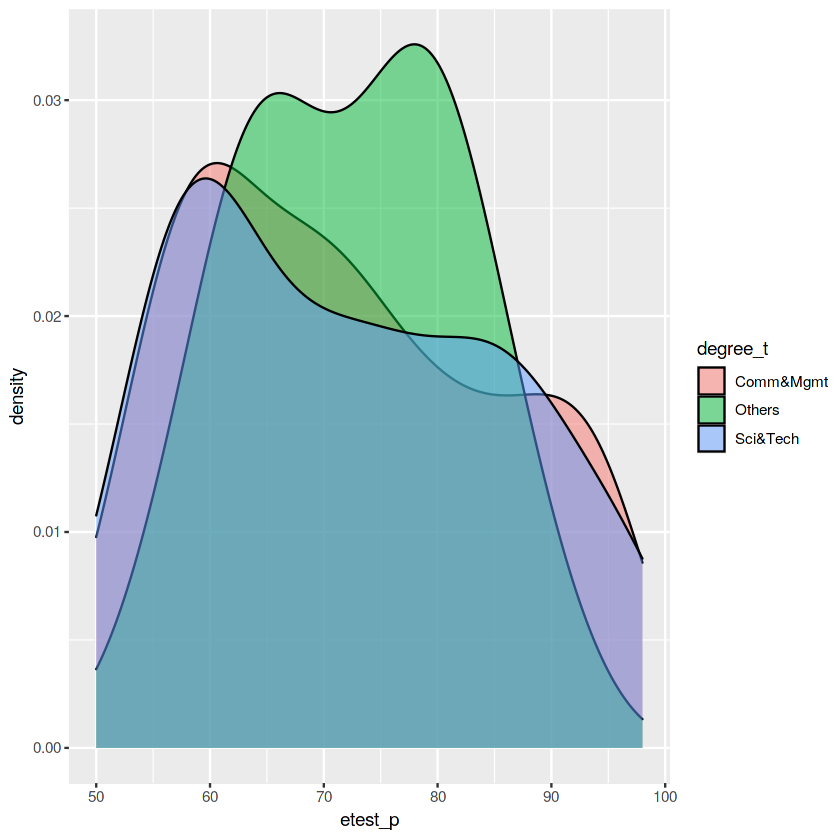

In [40]:
ggplot(placementgg) + geom_density(aes(etest_p, fill = degree_t), alpha = 0.5) #alpha is used to make the colour lighter

<a id="subsection-seven"></a>
# Box Plot
A box plot is a graphical representation of numerical data that can be used to **understand the variability of the data and the existence of outliers**. Box plot is designed by identifying the following descriptive statistics:
1.	Lower Quartile, Median, and Upper Quartile
2.	Lowest and highest value
3.	Inter-quartile range (IQR) 

The length of the box is equivalent to IQR. The dark line inside the box represents the median. The whisker of the box plot extends till Q1 – 1.5 IQR (or minimum value) and Q3 + 1.5 IQR (or maximum value); observations beyond these two limits are marked as dots and are potential outliers. 

**Faceting:** Faceting is used to further drill down data and split the data by one or more variables, and then plot the subsets of the data altogether for optimum data visualization in R. To facet your plot by a single variable, use facet_wrap(). To facet your plot on the combination of two variables, add facet_grid() to your plot call

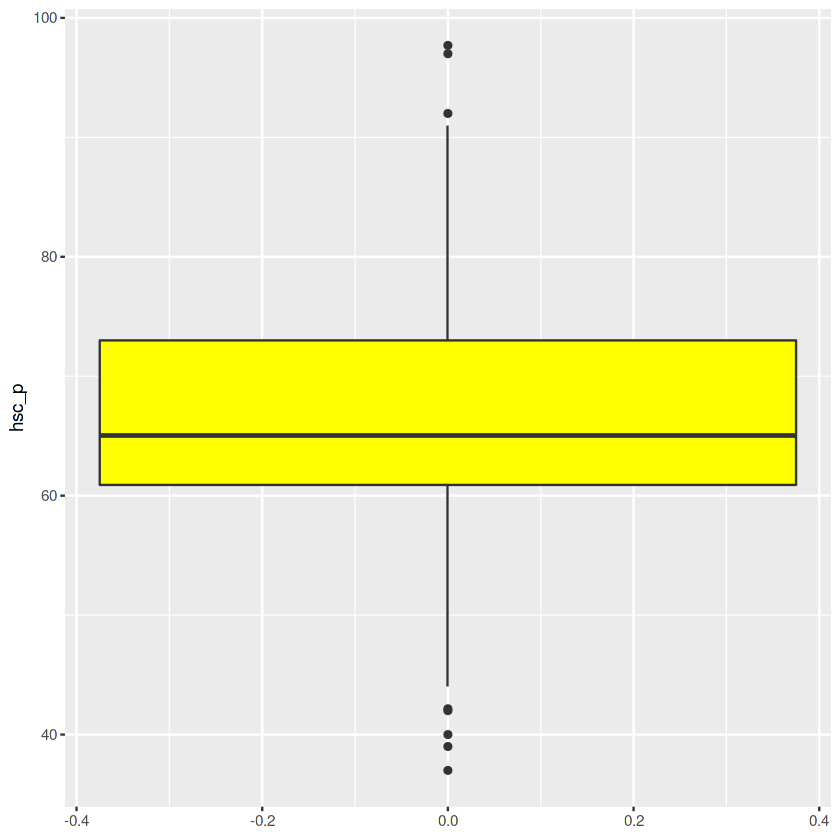

In [41]:
# Box Plot
base4 <- ggplot(placementgg, aes(y = hsc_p))
base4 + geom_boxplot(fill = "yellow")

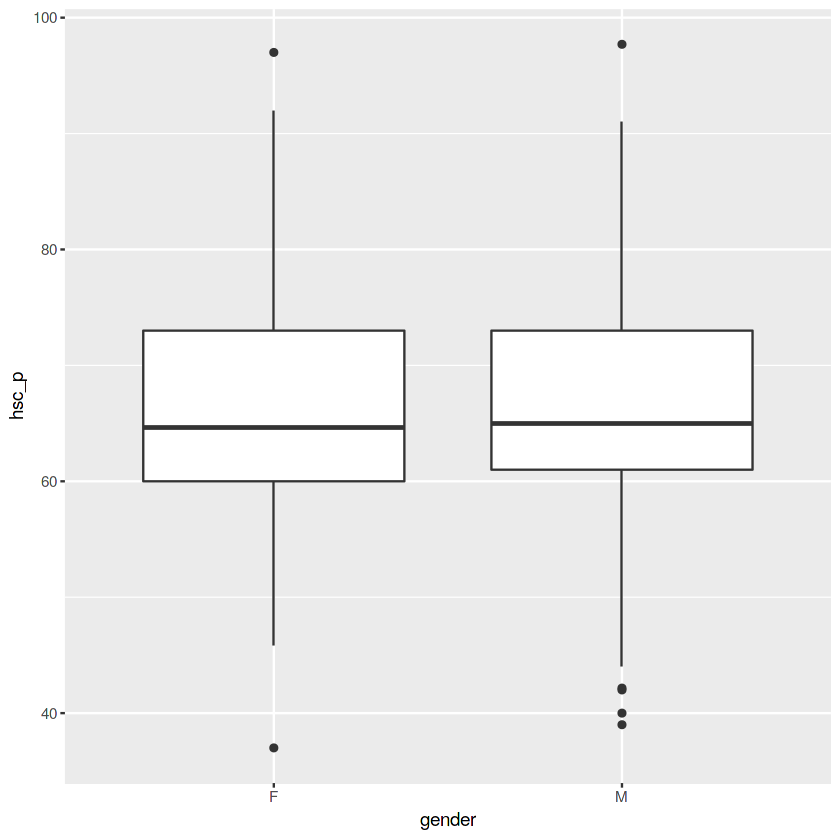

In [42]:
base4 + geom_boxplot(aes(x = gender))

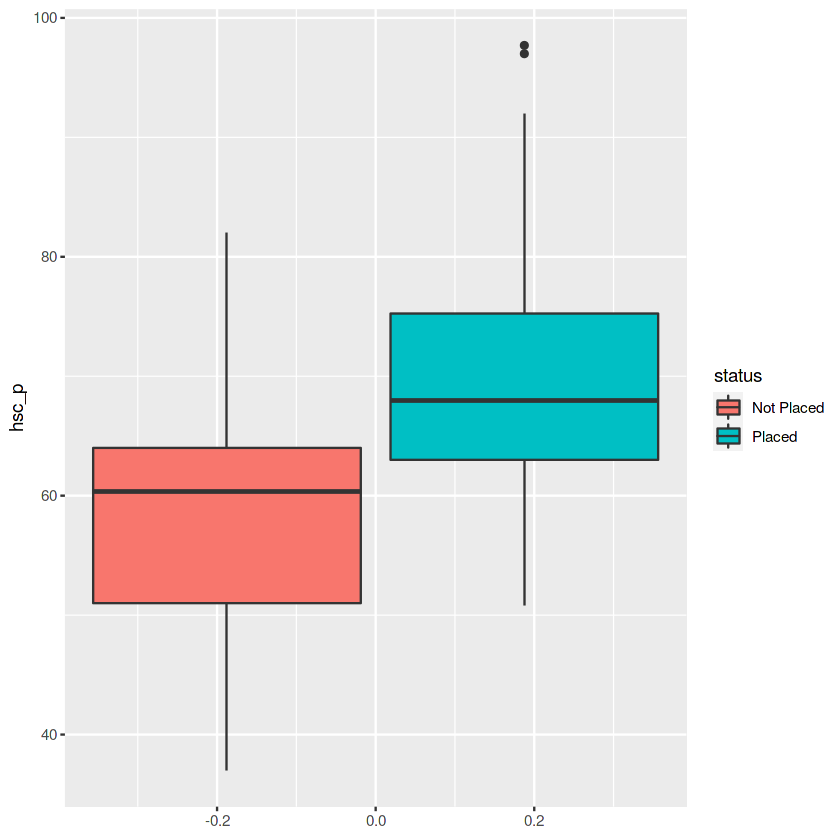

In [43]:
base4 + geom_boxplot(aes(fill = status))

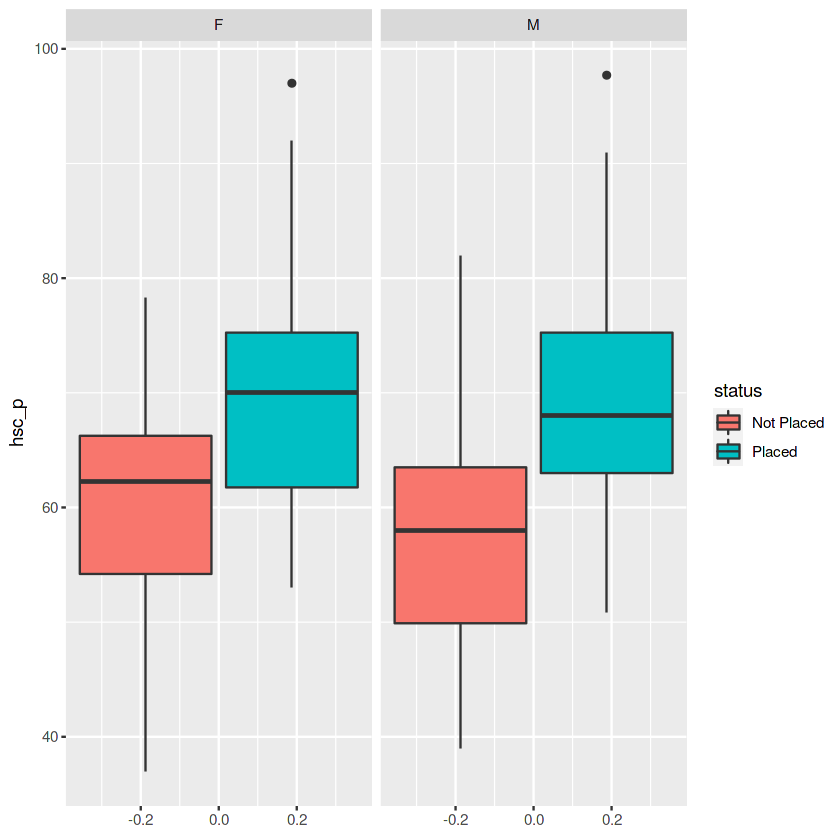

In [44]:
base4 + geom_boxplot(aes(fill = status)) +
  facet_wrap(~gender)

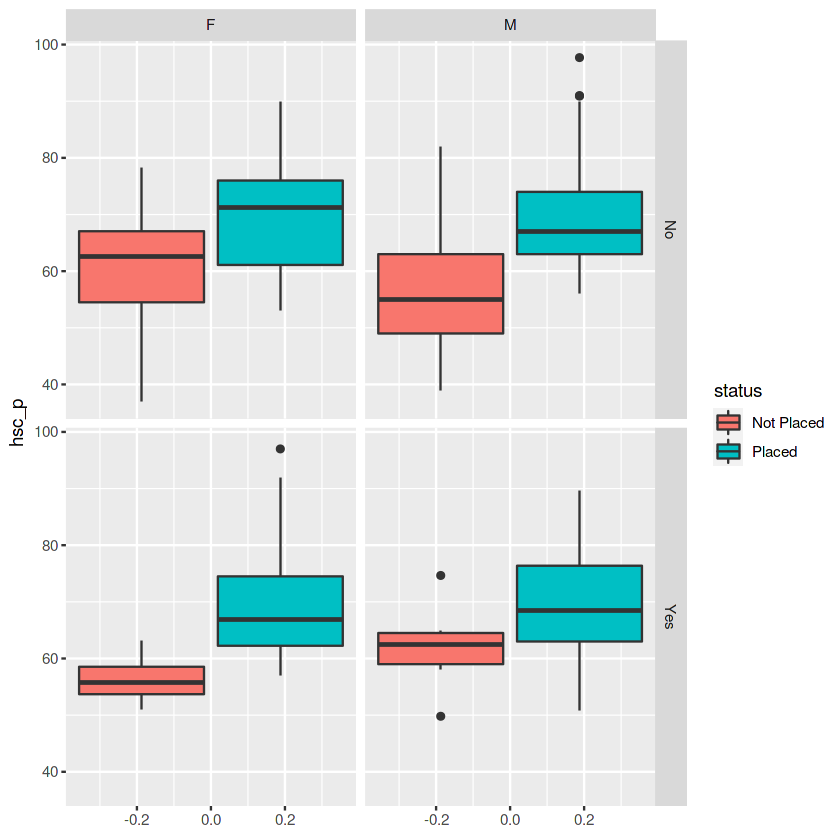

In [45]:
base4 + geom_boxplot(aes(fill = status)) +
  facet_grid(workex~gender)

<a id="subsection-eight"></a>
# Violin Plot
This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. geom_violin(), show a compact representation of the density of the distribution, highlighting the areas where more points are found.

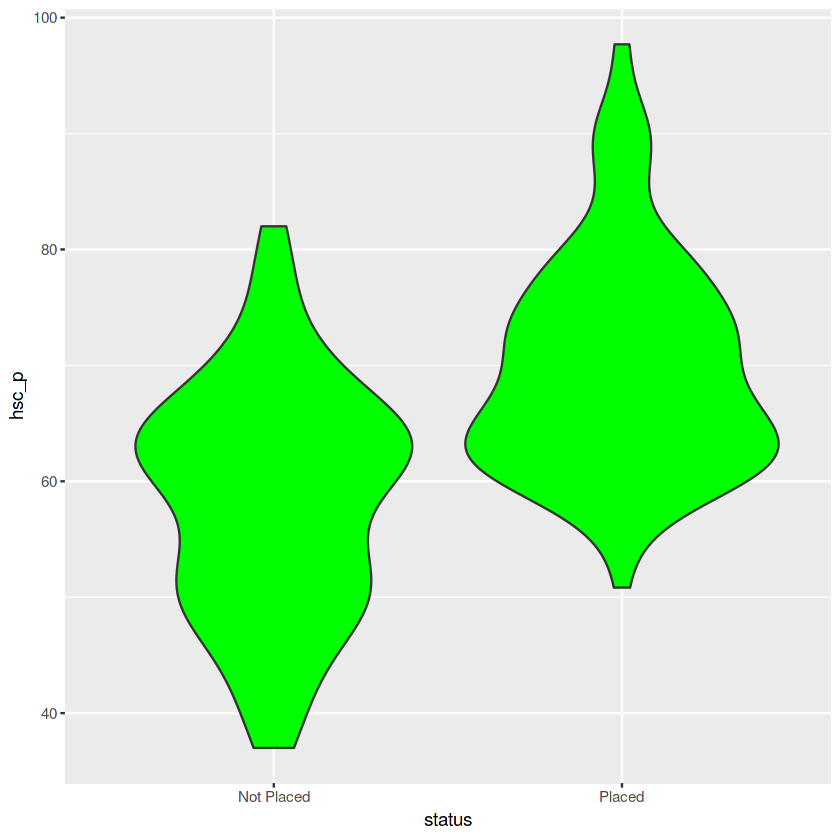

In [46]:
#  Violin Plot
base4 + geom_violin(aes(x = status), fill = "green")

<a id="subsection-nine"></a>
# Pie Chart
Pie chart is mainly used for categorical data. Pie Charts help show proportions and percentages between categories, by dividing a circle into proportional segments. Each arc length represents a proportion of each category, while the full circle represents the total sum of all the data, equal to 100%. <br>

Pie charts are not recommended in the R documentation. A bar is recommended because people are able to measure length more accurately than volume.

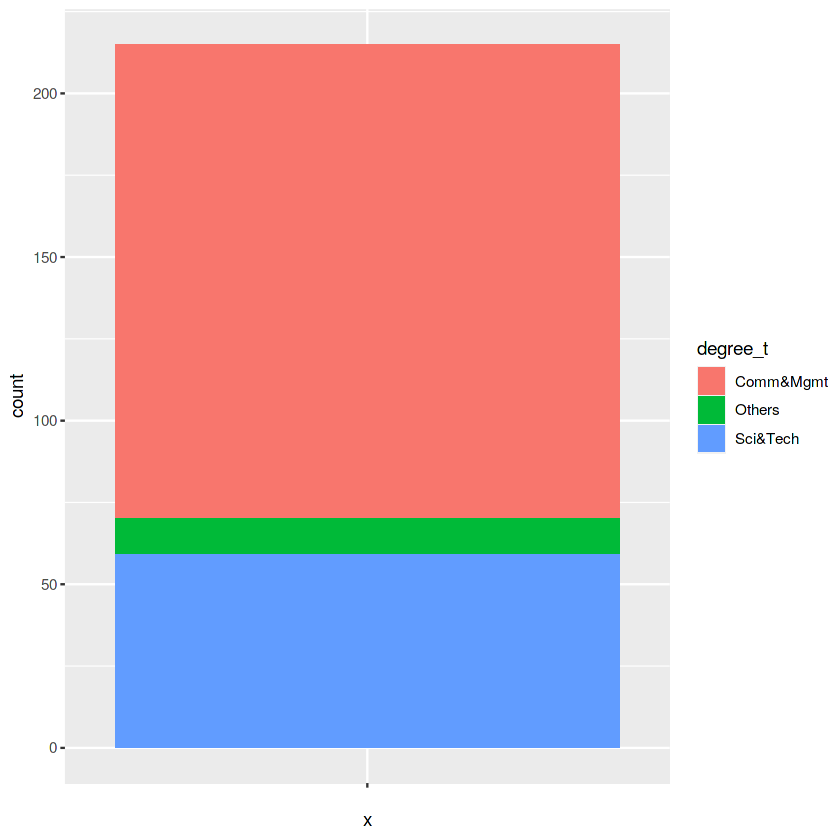

In [47]:
# Pie Chart
piebar <- ggplot(placementgg, aes(x = " ", fill = degree_t))+ geom_bar(width = 1)
piebar 

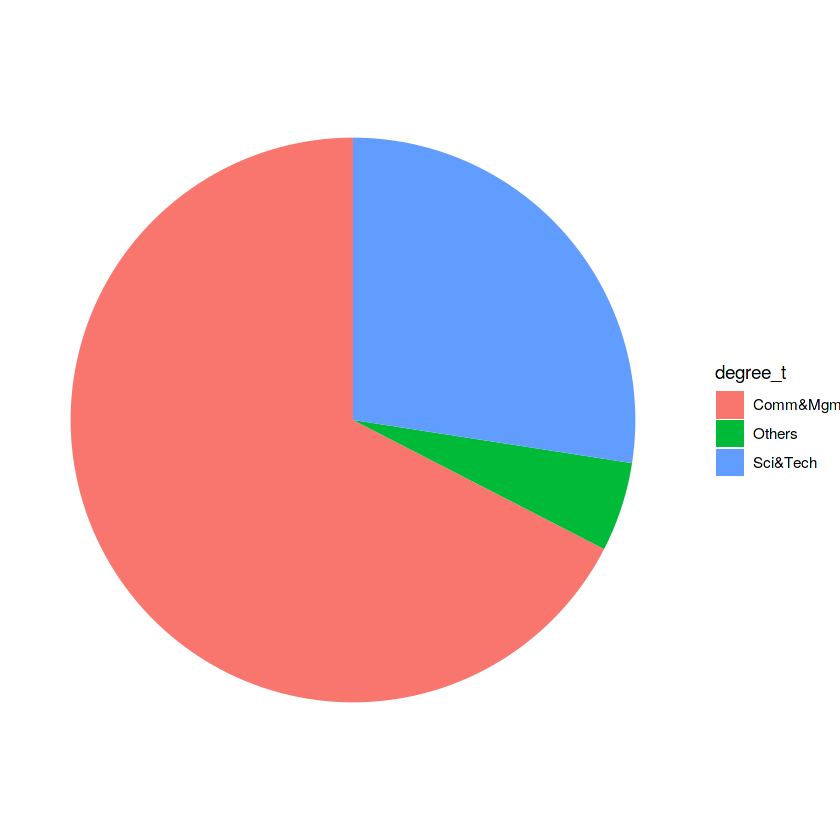

In [48]:
piechart <- piebar + coord_polar("y") + theme_void()
piechart

<a id="subsection-ten"></a>
# Heatmap
Heatmaps visualise data through variations in colouring. When applied to a tabular format, **Heatmaps are useful for cross-examining multivariate data**, through placing variables in the rows and columns and colouring the cells within the table. They use color to communicate relationships between data values that would be much harder to understand if presented numerically in a spreadsheet. Heatmaps are **good for detecting if any correlation exists between the variables**. 


In [49]:
# Heat Map
colnames(placementgg)

[1] "sl_no"          "gender"         "ssc_p"          "ssc_b"         
 [5] "hsc_p"          "hsc_b"          "hsc_s"          "degree_p"      
 [9] "degree_t"       "workex"         "etest_p"        "specialisation"
[13] "mba_p"          "status"         "salary"

In [50]:
placementgg_num <- placementgg[, c(3, 5, 8, 11)] # select only numeric
colnames(placementgg_num)

[1] "ssc_p"    "hsc_p"    "degree_p" "etest_p"

In [51]:
corr_matrix <- round(cor(placementgg_num),2)
df_corr <- reshape2::melt(corr_matrix)

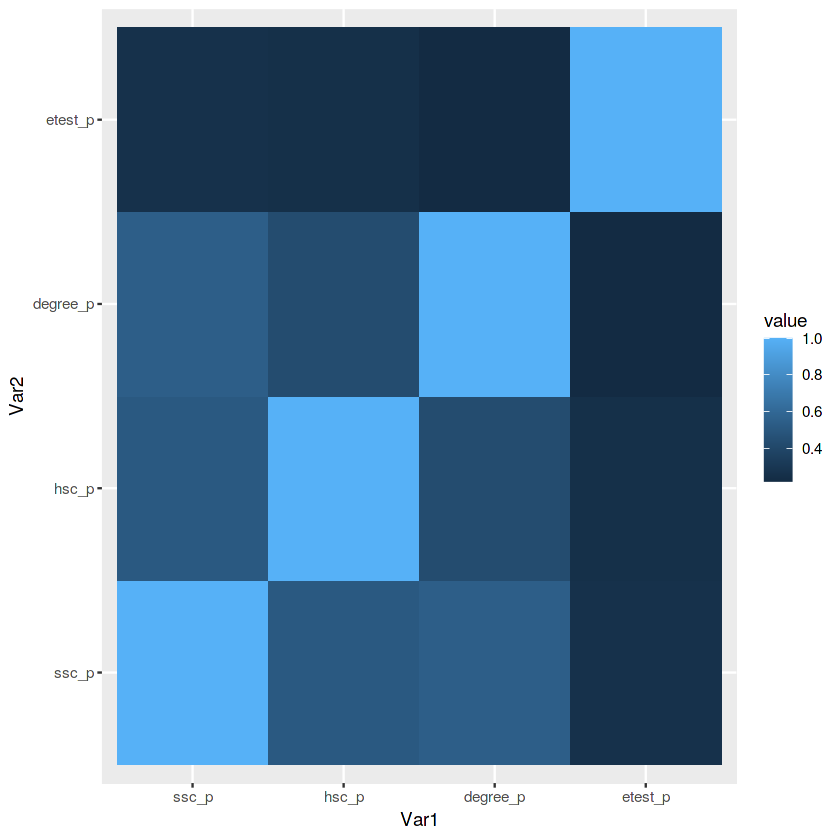

In [52]:
ggplot(data = df_corr) + 
  geom_tile(mapping = aes(x=Var1, y=Var2, fill=value))

<a id="subsection-eleven"></a>
# Scatterplot Matrix
A scatterplot matrix is a collection of scatterplots organized into a grid (or matrix). Each scatterplot shows the relationship between a pair of variables.
We will be using the GGally R package which is an extension to ggplot2. It creates a matrix with scatterplots in the lower diagonal, densities on the diagonal and correlations written in the upper diagonal. 


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



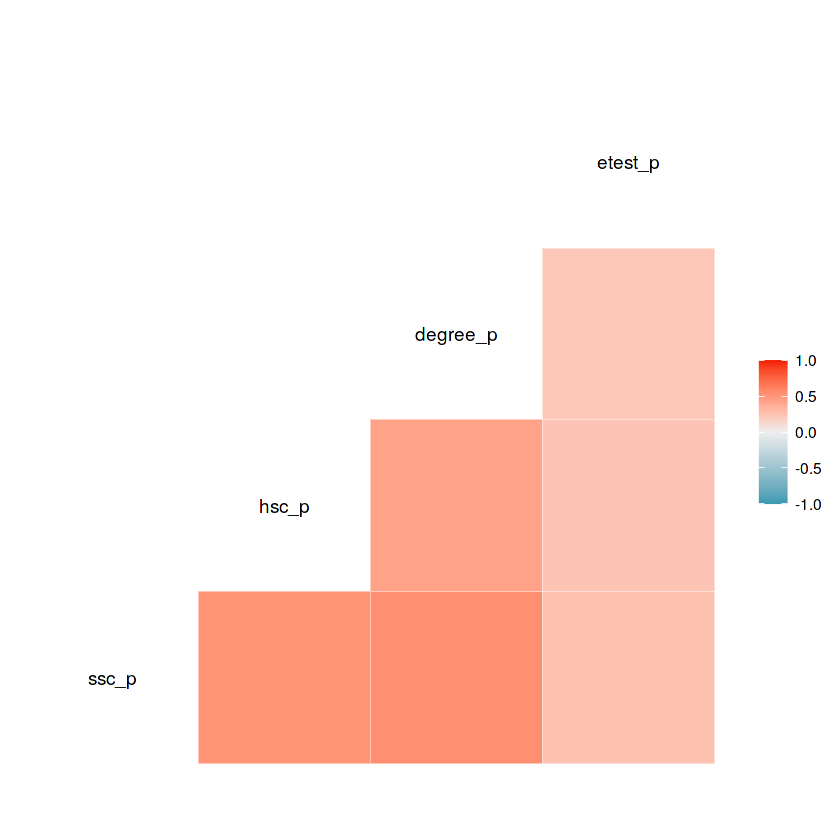

In [53]:
# Pairwise scatterplot matrix
#install.packages("GGally")
library("GGally")
ggcorr(placementgg_num)

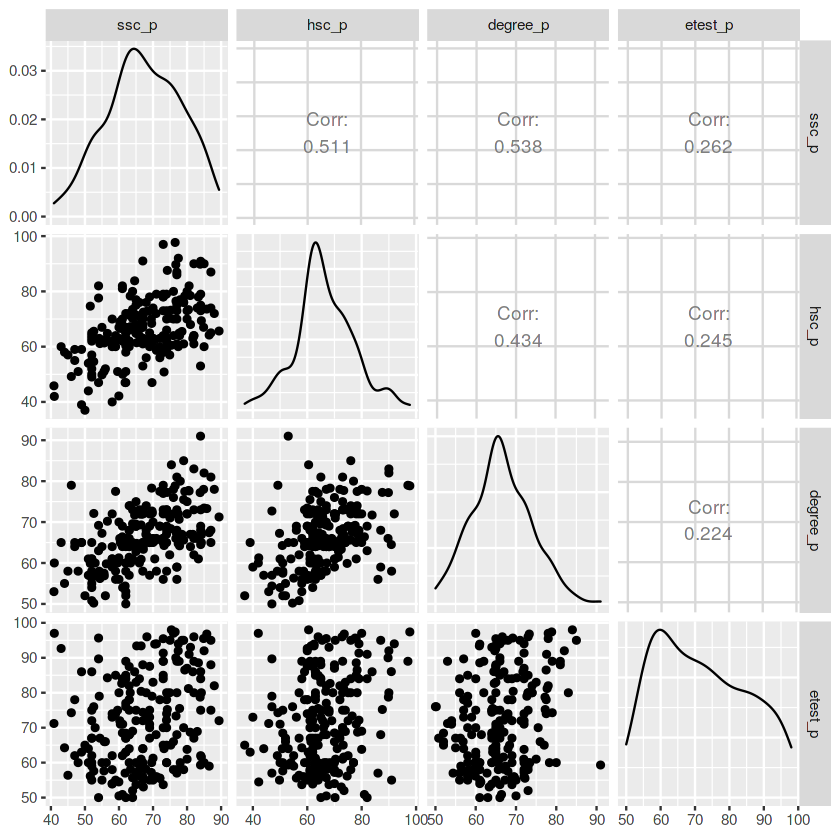

In [54]:
ggpairs(placementgg_num) # correlogram

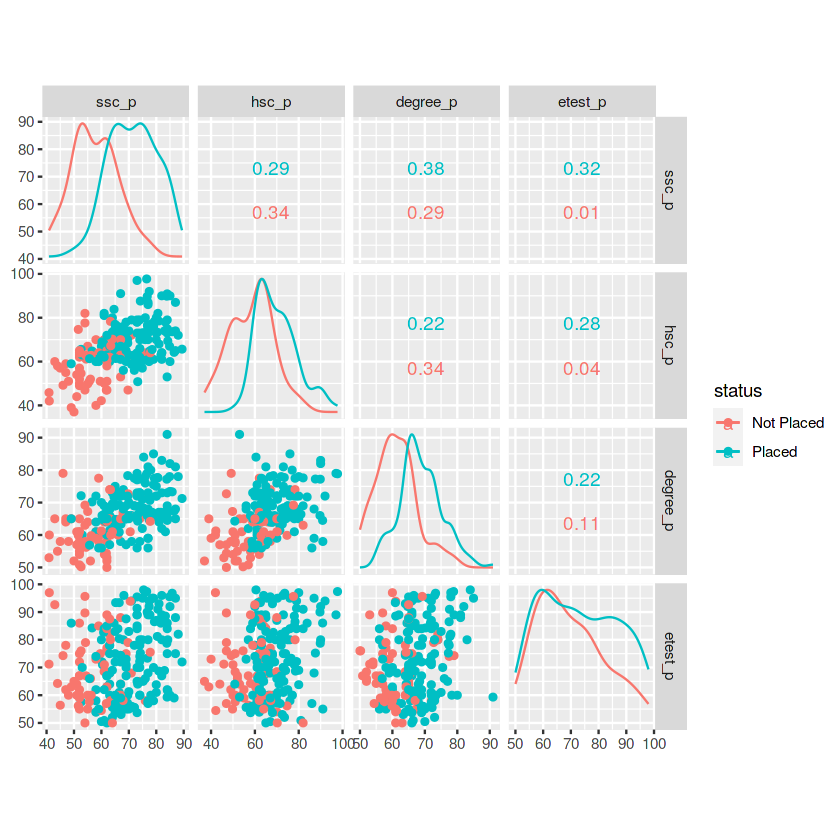

In [55]:
ggscatmat(placementgg, columns = c(3,5,8,11), color = "status") # alternative

<a id="subsection-twelve"></a>
# Mosaic Plot
A mosaic plot (also known as a Marimekko diagram) is a graphical method for **visualizing data from two or more qualitative variables**. The mosaic plot starts as a square with length one. The square is divided first into horizontal bars whose widths are proportional to the probabilities associated with the first categorical variable. Then each bar is split vertically into bars that are proportional to the conditional probabilities of the second categorical variable. Additional splits can be made if required. Mosaic plots are constructed hierarchically, so the ordering of the variables is very important.


Attaching package: ‘ggmosaic’


The following object is masked from ‘package:GGally’:

    happy




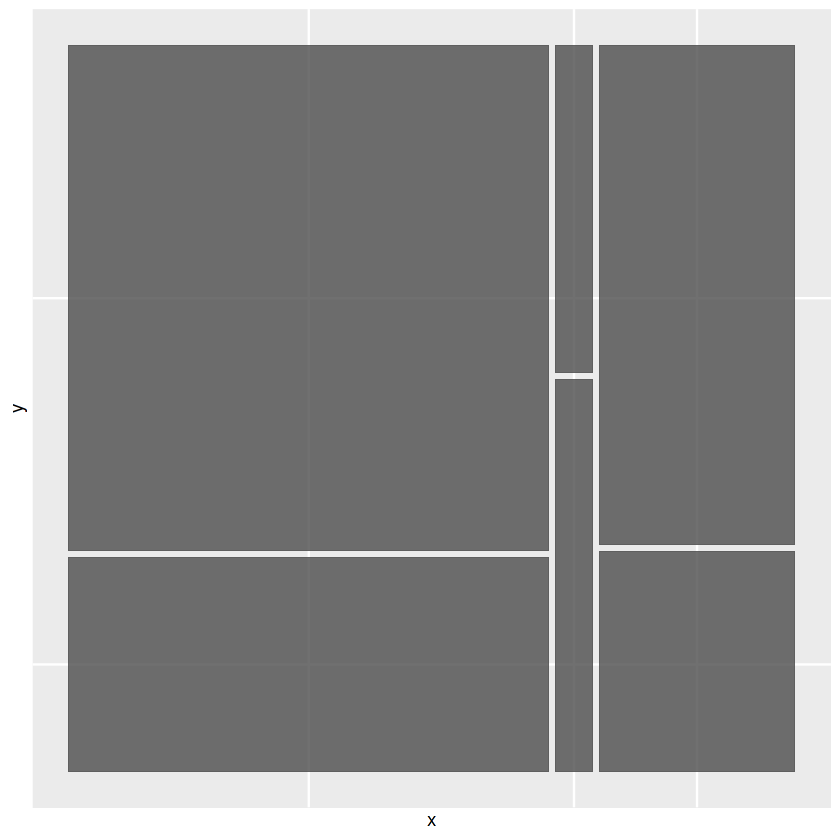

In [56]:
# Mosaic Plot
# install.packages("ggmosaic")
library(ggmosaic)
base5 <- ggplot(placementgg)
base5 + geom_mosaic(aes(x = product(status, degree_t)))

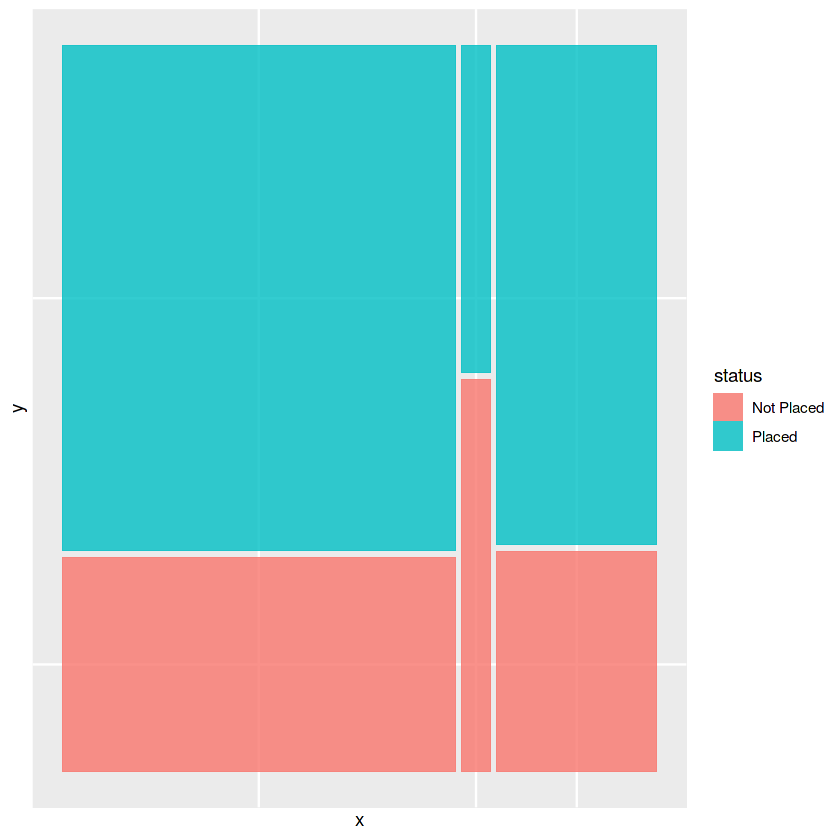

In [57]:
base5 + geom_mosaic(aes(x = product(status, degree_t), fill = status))

<a id="subsection-thirteen"></a>
# Quick Plot
In some cases, we will want to create a quick plot with a minimum of typing. In these cases we may prefer to use qplot() over ggplot(). qplot() lets us deﬁne a plot in a single call, picking a geom by default if we don’t supply one. To use it, we have to provide a set of aesthetics and a data set.


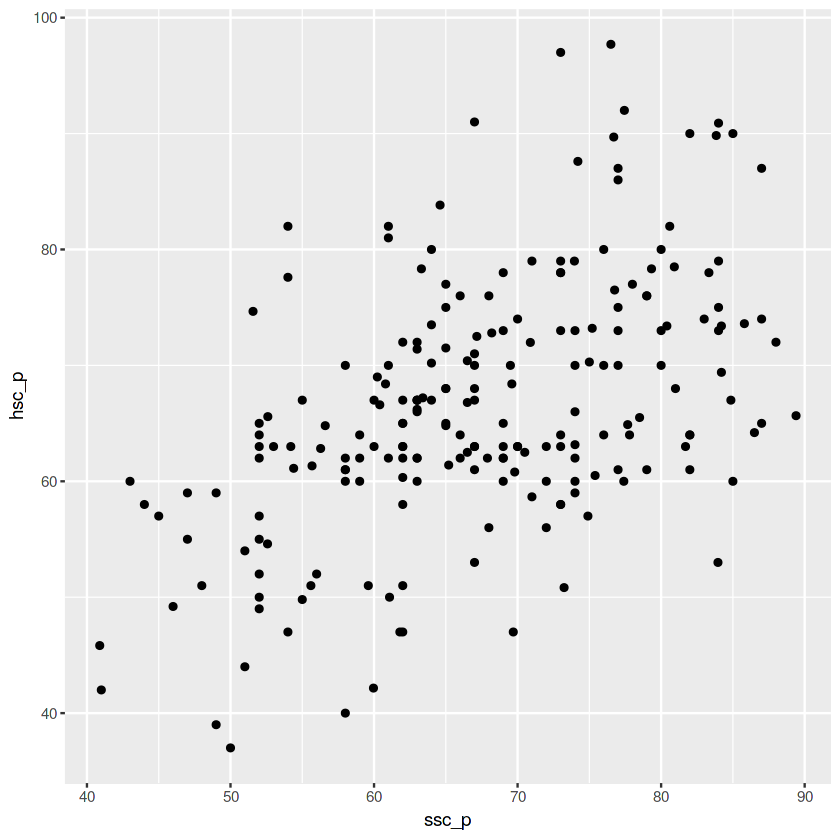

In [58]:
# quick plot
qplot(ssc_p, hsc_p, data = placementgg)

<a id="section-two"></a>
# Saving a plot
ggsave() is a convenient function for saving a plot. It defaults to saving the last plot that you displayed, using the size of the current graphics device. It also guesses the type of graphics device from the extension. You can also control the width, height and dpi using the additional arguments.
Alternatively, use the Export option available under Plots tab.


In [59]:
# saving a plot
ggsave("myplot.pdf")
ggsave("myplot.png")

Saving 12.5 x 6.67 in image

Saving 12.5 x 6.67 in image



# Part 5:[Descriptive Statistics using R](https://www.kaggle.com/benroshan/part-5-descriptive-statistics-using-r?scriptVersionId=34244116)- Click to learn
# Please hit an upvote if you like this kernel!